In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import numpy as np
from os import listdir
from os.path import isfile, join
import os

In [55]:
# ARGUMENTS

#DATA_DIR = str(sys.argv[1]) # DIRECTORY OF ALL BIN_SIZE FILES
#DATA_DIR = "/Users/ashleymaeconard/Desktop/singleCell/results_reproducible/T5_normal_read_count_vectors_1mb-1kb/data__read_depth_plot/"
#OUTPUT_NAME = "merged_cell_T5_normal_1MB-1kb"
#OUTPUT_DIR = "/Users/ashleymaeconard/Desktop/singleCell/results_reproducible/T5_normal_read_count_vectors_1mb-1kb"

# Consecutive Merged Cells
DATA_DIR = "/Users/ashleymaeconard/Desktop/singleCell/results_reproducible/T5_normal_merged_consec_3-31/data/"
OUTPUT_NAME = "merged_consec_T5_normal_3-31"
OUTPUT_DIR = "/Users/ashleymaeconard/Desktop/singleCell/results_reproducible/T5_normal_merged_consec_3-31/"
BINSIZE_INPUT = 500000

# Options to alter
RC_COV = 'COVERAGE' # READ_COUNTS, COVERAGE
LIM = 'NA' # 'NA' OR int(INTEGER)
VIOLIN_BOX = 'boxplot'# violinplot or boxplot
REMOVE_OUTLIERS = True


Plotting Coverage
Coverage Stats: 
            count      mean       std  min       25%       50%       75%  \
NUM_CELLS                                                                  
3.0        6070.0  0.107318  0.038537  0.0  0.100320  0.119928  0.129808   
5.0        6070.0  0.172446  0.061302  0.0  0.162944  0.193192  0.207480   
7.0        6070.0  0.242803  0.084901  0.0  0.232142  0.272840  0.290016   
9.0        6070.0  0.313258  0.109889  0.0  0.298832  0.352336  0.374680   
11.0       6070.0  0.348124  0.122115  0.0  0.332918  0.391856  0.416024   
13.0       6070.0  0.401565  0.139730  0.0  0.385472  0.452048  0.478800   
15.0       6070.0  0.470964  0.162819  0.0  0.454480  0.529872  0.560272   
17.0       6070.0  0.553884  0.192736  0.0  0.532000  0.624264  0.660288   
19.0       6070.0  0.616930  0.214604  0.0  0.593408  0.695552  0.735984   
21.0       6070.0  0.692591  0.240911  0.0  0.665000  0.781356  0.826120   
23.0       6070.0  0.753101  0.262634  0.0  0.722152 

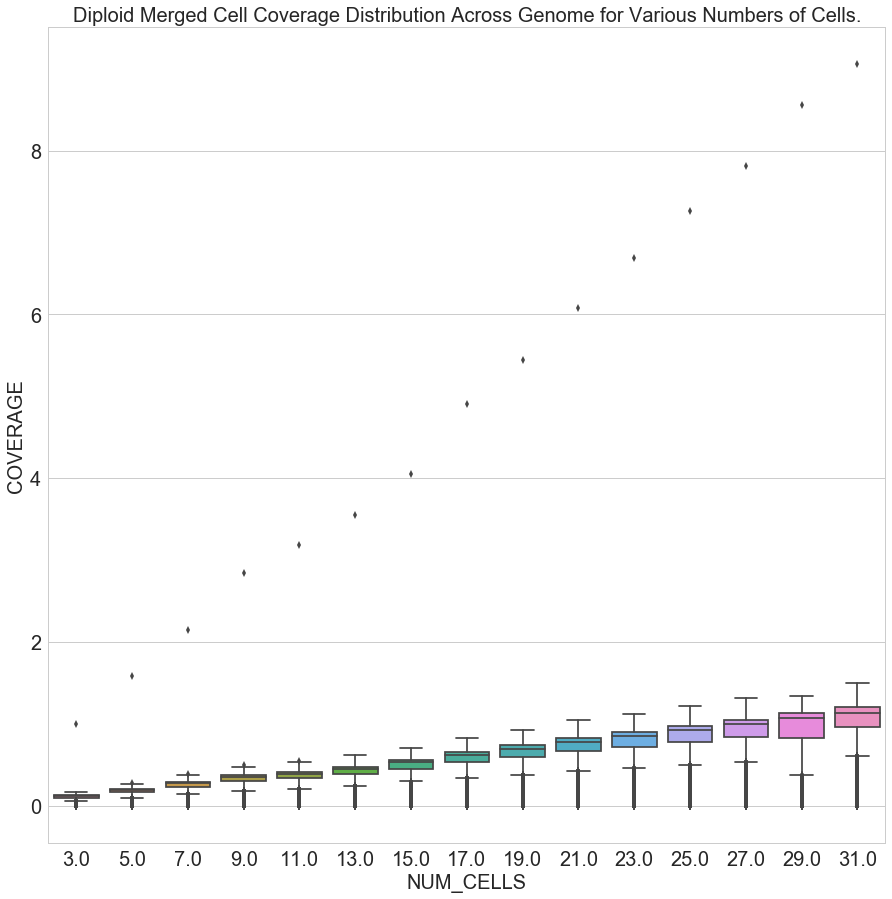

In [73]:
# CREATING PLOTS

master_df.NUM_CELLS = master_df.NUM_CELLS.astype(float)
master_df = master_df.sort_values('NUM_CELLS', ascending=True)
master_df.to_csv(OUTPUT_DIR+"/"+OUTPUT_NAME+"_"+RC_COV+"__plot_difBinsizes.csv")
plots(master_df, RC_COV, LIM, VIOLIN_BOX)

In [56]:
def reformat_df(data, numcel):
    df = pd.read_csv(data)
    len_rows = df.shape[0]
    df['NUM_CELLS'] = [numcel] * len_rows
    cell_name = list(df)[4]
    df.rename(columns={list(df)[4]:'READ_COUNTS'}, inplace=True)
    df['COVERAGE'] = df.apply(calc_coverage, axis=1) #df['COVERAGE'] = (df['BINSIZE']/binsize)*76

    return df
    

In [57]:
def calc_coverage(row):
    return (row['READ_COUNTS']/float(BINSIZE_INPUT)*76)

In [58]:
def get_sd(df):
    df[np.abs(df.Data-df.Data.mean())<=(3*df.Data.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
    df[~(np.abs(df.Data-df.Data.mean())>(3*df.Data.std()))] #or if you prefer the other way around

In [72]:
def plots(m_c_pd, RC_COV, LIM, VIOLIN_BOX): #LIM = NUMBER OR NA
    m_c_pd = m_c_pd.reset_index()
    list_max_vals = []
    
    # REPORT STATS WITH ALL DATA AND WITHOUT MAX VALUE
    if RC_COV == 'COVERAGE':
        print "Plotting Coverage"
        SNS_PLOT_TITLE = "Diploid Merged Cell Coverage Distribution Across Genome for Various Numbers of Cells."
        OUTPUT_NAME = '_RCvar__plot_difBinsizes.pdf'
        print "Coverage Stats: \n", m_c_pd.groupby("NUM_CELLS").COVERAGE.describe().unstack()
    
        # Get all the max values for each bin size.
        list_max_per_numcel = m_c_pd.groupby(['NUM_CELLS'])['COVERAGE'].max()
        for index in list_max_per_numcel.index:
            list_max_vals.append(list_max_per_numcel[index]) #print index, list_max_per_binsize[index]
        
        #print list_max_vals
        print "\nAll data in df is", m_c_pd.shape
        temp_m_c_pd = m_c_pd[~m_c_pd['COVERAGE'].isin(list_max_vals)]# != list_max_vals)]     
        print "Without max values, df is now: ", temp_m_c_pd.shape
        print "\nCoverage Stats without max values for each num cell: \n", temp_m_c_pd.groupby("NUM_CELLS").COVERAGE.describe().unstack()
    
    elif RC_COV == 'READ_COUNTS':
        print "Plotting Read Counts"
        SNS_PLOT_TITLE = "Diploid Merged Cell Read Count Distribution Across Genome for Various Bin Sizes"
        OUTPUT_NAME ='_covVar__plot_difBinsizes.pdf'
        print "Read Count Stats: \n", m_c_pd.groupby("NUM_CELLS").READ_COUNTS.describe().unstack()
        
        # Get all the max values for each bin size.
        list_max_per_numcel = m_c_pd.groupby(['NUM_CELLS'])['READ_COUNTS'].max()
        for index in list_max_per_numcel.index:
            list_max_vals.append(list_max_per_numcel[index]) #print index, list_max_per_binsize[index]
        
        #print list_max_vals
        print "\nAll data in df is", m_c_pd.shape
        temp_m_c_pd = m_c_pd[~m_c_pd['READ_COUNTS'].isin(list_max_vals)]# != list_max_vals)]     
        print "Without max values, df is now: ", temp_m_c_pd.shape
        print "\nCoverage Stats without max values for each num cell size: \n", temp_m_c_pd.groupby("NUM_CELLS").READ_COUNTS.describe().unstack()
    
    else:
        sys.exit("ERROR: Neither READ_COUNTS nor COVERAGE specified")
    
    # REMOVE OUTLIERS TO PLOT
#     if REMOVE_OUTLIERS: # OPTIONAL: Change from all to <22000 to <5000 for filtering.
#         print "\nWill remove outliers (>65000 for RC and >15 for Coverage. This is max val: ", m_c_pd.loc[m_c_pd['COVERAGE'].idxmax()].COVERAGE, 'for bin size', m_c_pd.loc[m_c_pd['COVERAGE'].idxmax()].NUM_CELLS
#         if RC_COV == 'READ_COUNTS':
#             m_c_pd = m_c_pd[(m_c_pd['READ_COUNTS'] < 100000)]#& (m_c_pd['BINSIZE']!=1000000) & (m_c_pd['BINSIZE']!=500000) & (m_c_pd['BINSIZE']!=250000)]
#         elif RC_COV == 'COVERAGE':
#             m_c_pd = m_c_pd[(m_c_pd['COVERAGE'] < 2)]#m_c_pd.loc[m_c_pd['COVERAGE'].idxmax()].COVERAGE)]
    
    sns.set_style("whitegrid")
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)# the size of A4 paper
    sns.plt.title(SNS_PLOT_TITLE, size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    
    if RC_COV == 'COVERAGE':
        sns.plt.ylabel('Coverage', size = 20)
    elif RC_COV == 'READ_COUNTS':
        sns.plt.ylabel('Read Counts', size = 20)  
    sns.plt.xlabel('Num. Cells', size = 20)
    
    # ZOOM into the plot.  
    #    if type(LIM) == int:
    #    plt.ylim(ymin=-100,ymax=6000) #OPTIONAL: Zoom into a specific part of plot
        
    # Violin or Boxplot
    if VIOLIN_BOX == 'boxplot':
        ax = sns.boxplot(x=m_c_pd['NUM_CELLS'],y=m_c_pd[RC_COV]) #ax = sns.boxplot(x=m_c_pd['BINSIZE'],y=m_c_pd['READ_COUNTS'])#, width=1, bw=.1)
    elif VIOLIN_BOX == 'violinplot':
        ax = sns.violinplot(x=m_c_pd['NUM_CELLS'],y=m_c_pd[RC_COV])
    
    # Save figure
    cell_n = cell_name.replace("binsXcells__read_depth_plot.csv","")
    plt.savefig(OUTPUT_DIR+"/"+cell_n+'_'+VIOLIN_BOX+'_'+OUTPUT_NAME)

    plt.show()

In [63]:
# MAIN
counter = 0 # keeping track of the number of cells which have been processed.

# Create list of all .bam files to transform into vectors of normalized read counts
onlyfiles = [f for f in listdir(DATA_DIR) if isfile(join(DATA_DIR, f)) and "binsXcells__read_depth_plot" in f]
print "Data to process: ", onlyfiles, "\n"

if ".DS_Store" in onlyfiles:
    onlyfiles.remove(".DS_Store")

# DF to fill with vectors of normalized read counts across all cells in the input directory
master_df = pd.DataFrame(columns=('CHR', 'START', 'END', 'READ_COUNTS', 'NUM_CELLS'))

for cell_name in onlyfiles:
    counter+=1
    #bin_size = cell_name.split("_")[-6]
    num_cel = cell_name.split("_")[0]
    num_cel = num_cel.replace('cells','')
    print "File # ", counter ," of ", len(onlyfiles),". Num Cells ",num_cel, " in DIR+name: ", DATA_DIR+cell_name, "\n" # file and filepath
    
    # Reformat df
    df_reformatted = reformat_df(DATA_DIR+cell_name, num_cel)
    
    # Append to master_df
    master_df = master_df.append(df_reformatted)
    

Data to process:  ['11cells_500000_binsXcells__read_depth_plot.csv', '13cells_500000_binsXcells__read_depth_plot.csv', '15cells_500000_binsXcells__read_depth_plot.csv', '17cells_500000_binsXcells__read_depth_plot.csv', '19cells_500000_binsXcells__read_depth_plot.csv', '21cells_500000_binsXcells__read_depth_plot.csv', '23cells_500000_binsXcells__read_depth_plot.csv', '25cells_500000_binsXcells__read_depth_plot.csv', '27cells_500000_binsXcells__read_depth_plot.csv', '29cells_500000_binsXcells__read_depth_plot.csv', '31cells_500000_binsXcells__read_depth_plot.csv', '3cells_500000_binsXcells__read_depth_plot.csv', '5cells_500000_binsXcells__read_depth_plot.csv', '7cells_500000_binsXcells__read_depth_plot.csv', '9cells_500000_binsXcells__read_depth_plot.csv'] 

File #  1  of  15 . Num Cells  11  in DIR+name:  /Users/ashleymaeconard/Desktop/singleCell/results_reproducible/T5_normal_merged_consec_3-31/data/11cells_500000_binsXcells__read_depth_plot.csv 

File #  2  of  15 . Num Cells  13  in 

### Testing


In [225]:
# Visualize read count distribution using histogram
kb500 = [141,1573,2545,4371,3275,1464,3011,3787,6671,6280,7149,6042,4178,6859,6551,6407,7292,8469,5746,6240,8255,5027,6384,5429,6924,5166,1995,7717,8368,6631,6719,6457,5521,3808,6295,5814,5870,5595,6734,7559,6734,7517,6984,5526,6558,5336,7882,6683,6993,6713,5970,6481,6357,6660,6305,6564,8149,7510,6495,6169,4739,5944,7531,6420,7068,7136,6861,6966,7687,7293,8901,8456,6659,6181,6833,6779,6562,7368,7874,6793,8349,7122,7056,6412,9030,8402,6943,6321,7316,6685,8249,8849,6958,7116,7209,6239,8373,7794,8768,9422,8040,9336,8574,8286,8516,8254,6211,6606,6273,6167,7404,8175,8201,7891,8089,8186,7710,7352,8302,8250,8694,8463,7931,8791,7687,8737,8117,8234,7796,8802,8558,8724,7993,8403,8588,8315,8354,9315,8704,8754,8604,9246,8395,8277,7512,8757,8893,9100,8699,8965,9214,8631,8937,8869,8489,9248,9050,8832,8118,8090,8650,8760,8390,8365,8465,8433,4765,8990,8889,8322,8009,7791,8241,8229,7994,8369,8927,9184,8845,8064,8520,9270,8076,7959,8930,8607,8598,7706,8085,8168,8722,9250,9352,8869,8419,8736,8747,9047,8452,8781,8905,9240,8793,8598,8930,8205,8690,6055,8861,8589,9137,8664,8918,9491,8511,9282,5160,8374,7160,6376,6453,8210,8915,7482,7779,7095,8032,8923,8163,8937,8046,8127,8284,7303,8643,8181,8571,8802,7967,7476,1249,943,2178,1756,159,13,1,2,1,1209,2236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,856,1718,321,258,805,6054,1360,1639,7639,7225,3053,558,1034,2790,8412,7718,7318,7525,7962,7279,8560,4176,7636,6494,5180,6962,5461,5284,8012,8833,8154,9241,8551,7404,7534,8120,6521,6481,8068,8178,8609,8739,9343,8074,8035,8519,8464,8481,8499,8327,7821,8925,8685,8139,9106,8854,8592,8289,8596,8777,9022,8815,9077,8784,8110,7857,9526,8363,8424,8408,8645,8452,8689,8097,7887,7933,7300,8619,8532,8594,8349,8362,8836,8205,8975,8330,8191,8810,9005,8145,8817,8268,8220,8638,8242,9124,9309,8651,8919,8191,9262,8956,8369,8816,8794,8495,8729,7684,8971,8103,6080,4559,9089,9293,8182,7980,4928,6434,5878,6906,6264,7638,6089,7159,6250,6736,4157,7290,8808,6703,7186,8479,8480,7774,8509,8299,8971,7885,8313,7664,8863,7916,8110,8473,8995,8628,8717,8481,8464,8330,8761,8641,9104,8299,8332,8201,9123,8418,8116,8358,7050,5154,7981,8191,9138,7514,7620,6419,8851,6932,5302,6120,7739,8103,7206,7392,7725,8309,7671,8007,8681,8674,7857,7057,8361,7986,8011,8288,8367,8599,8810,8371,8693,8085,8891,8427,8404,8538,7187,7349,4,1583,7915,8115,4883,4562,8769,7581,7685,8393,6232,4618,7383,5184,3872,5151,7986,6765,4961,6961,8167,8045,8297,8025,8624,7865,7867,7986,7476,7225,7203,7452,5037,6652,7675,6892,8104,7775,8755,8653,8811,8146,8425,7366,7149,7863,8953,7735,8227,8317,8366,7765,7253,7032,7962,8933,9027,8863,7492,7084,8084,8394,6938,8349,7775,6240,6440,8766,7904,7886,7398,8243,7926,7503,7581,9506,8578,8915,8424,8217,8753,8851,8639,9080,6190,8349,8522,8215,8154,8004,9055,8892,8212,8695,9079,8140,7762,7425,7227,8155,8594,7906,7346,8000,7331,7831,7155,7513,8923,8348,8745,9148,8223,8823,8754,8747,8601,8578,9692,8856,8376,7888,8391,8327,8603,9073,8717,8801,8155,8744,9004,8879,8025,8260,9447,8444,8092,8716,9846,9010,7842,7465,7908,8523,8016,8517,9153,8959,8813,8632,8439,8484,8086,7260,7361,6189,8498,8630,7156,7754,6767,7587,8707,8967,9186,8715,8409,8620,9845,8029,8591,8624,8498,9206,8954,9183,8972,8449,8421,8768,8966,8508,7224,6435,8394,6123,1441,1230,8044,7774,1678,2071,866,0,175,2286,690,640,726,588,1189,5522,5585,4037,6194,6324,2374,6088,7886,7463,9617,8356,7247,7384,7713,8402,8232,8424,9378,9432,9063,8023,7921,7635,5811,8327,8869,7867,8385,7033,6549,3705,2358,6500,4987,4887,7043,7747,5374,6263,8930,8575,9139,7224,8459,7754,8700,7850,8652,7325,6570,8279,7134,5020,7602,8116,7970,9123,9399,9283,7766,8305,9798,9105,8530,7852,7028,7064,7178,7641,8848,7723,3370,4298,4826,3643,5330,8466,8682,8189,7805,8760,8973,8902,8539,9074,8698,8262,8773,8707,9480,8824,8196,8255,8591,7909,8879,8540,8440,8163,8772,8659,8559,8445,8921,8495,8693,8922,8942,7974,8284,8997,8631,8662,8801,7534,8744,9256,8712,9603,8266,8822,9413,9113,8885,9126,9079,9141,8596,8052,8443,8706,7931,8901,9171,9134,7729,8526,8649,8741,8766,8360,8326,8022,8147,8535,8977,8107,8740,6923,8552,8205,8844,7698,9204,8588,7623,8283,8052,8296,7857,8164,8592,8643,7900,8413,8604,8030,8551,7881,8546,8367,9431,8678,8786,8365,8866,8667,8872,9441,9214,9366,8464,8502,8813,8951,8652,8288,8377,8905,8341,8678,8780,8484,8462,8271,8173,8304,8761,8607,8476,8957,8768,8883,9064,8537,8394,8635,8891,8983,8712,8249,8376,8759,8181,8484,8049,8796,8453,8274,8764,8802,8261,8023,8476,8668,8229,7774,7961,9066,8513,8612,8924,8806,7908,7933,7776,8472,8406,8675,8527,8611,8495,8531,7731,7038,8360,6599,6346,6954,5807,6949,8909,8560,8561,8719,8419,8491,8785,8146,8110,8129,8358,8709,8709,9044,8255,8582,8950,9088,8955,8421,8517,7769,7273,6283,7079,7529,6802,7940,8021,7722,7599,6685,7085,6632,7283,6305,6436,6522,5499,5437,5623,3784,6492,3159,172,7368,8268,8925,8762,8283,8322,8452,8071,8645,8257,8423,8983,8866,8481,8746,8838,7951,7012,7807,6567,6034,6574,7724,5158,8254,6572,5021,5963,6602,6754,7514,9006,7801,8506,8238,8826,8636,8610,8834,8773,6991,9412,9135,8857,8445,9439,8968,8729,8802,9022,8991,9089,8942,9075,8917,8866,8834,8958,9186,8428,8517,8294,8660,8778,7676,8300,9015,9089,8751,8663,9358,8842,9033,8734,8932,7879,7034,7634,7548,9174,8228,9103,8974,9269,7788,7230,8118,8329,8069,7854,7766,7765,8062,6063,7692,8375,7164,6624,6305,6346,4571,8204,8935,7147,4803,7383,7209,7909,8159,7957,8293,7784,9163,8548,8166,8592,7887,7163,8940,8366,9292,8662,8815,9302,8669,8673,8506,8597,8692,8364,8855,8829,8563,8177,9202,9165,8564,8794,8278,8585,8125,8936,8731,7848,7418,7923,8640,8517,8612,8736,6562,5960,8194,8420,8182,8238,8540,8511,8353,8412,9013,8654,8160,8034,8641,8449,9248,8730,9138,8727,7858,7924,8226,8440,8727,9071,8894,9281,7752,8532,9169,3890,2676,783,164,157,65440,4700,9163,9049,8497,8642,8581,8449,8476,8385,8939,8747,9129,8559,8747,9142,9538,8566,8912,8557,8423,8559,9200,9272,8932,8271,8598,8649,9072,7925,7994,8876,8744,9050,8853,8879,9388,8225,8660,9173,8006,8859,8284,9023,9611,8776,8474,8664,8283,8448,9260,8519,8484,9111,8509,8574,9930,8637,9172,7990,6702,7573,7481,7530,9012,4033,6307,7046,5852,6782,6396,6950,6276,7250,6973,8837,8587,8930,7797,8867,8008,7396,7957,7461,7822,8524,8889,9667,8561,9184,7549,8549,8573,8309,7875,9136,7487,8257,8997,8838,8396,8124,8823,8434,8894,8684,9125,8102,8190,8915,8862,8578,8349,9203,8308,8358,8594,5873,8151,8444,8497,9074,5691,9396,8473,8703,7975,8338,8547,8865,9240,8091,8720,8640,8082,8952,8595,8785,8580,7211,8942,8710,8449,8478,8776,8096,5304,8154,8507,8637,8884,8694,8440,8324,8713,8418,8777,8587,8711,8736,8990,8434,8351,8552,8268,8326,8361,8982,8551,8137,8796,9076,8438,8142,8717,9311,9099,8286,8945,8695,7826,8052,5452,6871,8739,7966,7764,7655,8299,8023,8744,8853,8594,8759,8308,8814,8608,8604,8597,8212,8415,7682,6659,7091,6920,2796,7261,7383,6989,6617,737,8054,4680,4735,4553,6203,7153,5820,3255,5452,7069,7903,6462,5562,6174,4445,5245,4284,3981,2407,5746,7131,8379,8332,9004,8921,8611,8775,8446,8578,8379,9113,8429,8313,8155,8586,8520,8775,8657,8627,8786,8617,8401,8259,4858,8954,8846,9239,8587,8038,7962,8419,7658,8004,8309,8528,8935,9009,8368,8631,8488,8673,8177,8502,7896,8547,8596,8347,8625,8399,2322,8155,8859,8723,9350,8885,7846,8088,8220,8371,8144,8620,7665,8703,7869,8314,8445,8695,8814,8667,8888,8659,9333,8750,8784,8359,8746,8346,8687,3244,1906,393,349,471,3485,8178,7463,8450,8269,7869,8704,8569,7023,8798,7956,8553,8388,8480,7479,8965,8815,8588,8689,8312,7878,8912,8416,8298,8518,8105,8117,7540,8372,9104,8501,9070,8719,5539,2088,6650,8584,8908,8640,8604,9011,8943,9015,8892,8910,8667,8892,8979,8125,8669,8553,7829,8908,8060,8345,9031,8587,7874,8693,8714,8554,8425,8279,8036,8274,8266,8195,9304,8041,8539,8506,8349,8395,8356,8957,8224,8329,8150,8405,8264,8866,8207,8327,8065,8225,8691,8949,8346,8902,8775,8659,8817,9048,9033,8095,9060,8326,8901,9441,9069,8731,9340,8370,8768,8667,9358,9339,8738,8577,8952,8315,8778,8706,8329,8363,8388,8583,8327,7594,8820,8325,8344,8182,8220,8283,9496,8839,8941,8731,8183,8521,8663,9354,7572,6328,6513,8657,6039,9187,8450,8649,8929,8705,8785,9234,8530,8676,8275,8447,8649,8659,9791,8366,8722,8592,8540,8414,8345,8839,8507,5663,8763,8317,8156,8808,9146,8526,7762,8548,8654,8595,8634,8542,8392,8073,8248,7962,8229,7971,9164,9066,8890,9021,8955,6657,7877,9088,8750,8699,8494,8218,8409,8635,8581,9026,8907,8878,8210,9168,8696,8141,8580,7739,8324,8453,8415,8277,8490,6016,8399,8480,8611,8958,8464,8476,8567,8739,8607,8581,8755,8273,8618,8761,8109,8460,8535,8335,7473,8523,8323,8135,8326,8739,8505,8675,8843,8086,8319,8772,9159,8254,8619,8839,8688,7853,8919,7961,8132,8420,8437,8342,8490,8637,8591,8464,8317,8357,8034,7889,7955,8356,8084,7388,8156,7338,7532,7499,7984,7310,7338,6453,6803,8749,5358,7347,5774,73,469,4802,2606,1158,4900,6747,6872,7023,7408,8263,8693,8096,8217,7741,7436,7562,8192,8309,8796,7966,8778,7384,7454,7773,8559,8771,7341,8900,8460,7516,7870,8555,8288,8613,7799,8048,7337,8749,8138,8331,9036,9238,6291,7072,6981,7330,8397,8986,9178,8660,8823,8395,8932,8565,8469,8183,8718,8004,8483,4334,9002,8666,8835,8434,7861,8236,8334,8963,5757,4554,8300,8717,8283,8627,8531,8484,8566,8121,8473,8328,8695,9057,8842,8691,8997,8585,8439,7948,8668,9034,8305,8686,8482,7928,370,379,0,2,1,0,868,6304,7820,7913,8474,8739,8192,8626,9153,8970,7844,8575,8356,8037,8401,9517,8730,7779,8404,8728,8570,8935,8613,8679,8505,9341,8197,8993,8665,9060,8516,8942,8881,8703,8585,8481,8980,8276,8620,3662,82,58,76,66,7000,8544,8613,7879,8880,8131,8794,9050,8516,7994,8131,8562,7991,9234,7679,8348,8334,8121,8295,7841,8307,8423,8892,8658,8278,8590,8365,8936,8835,7423,8622,9428,8647,8766,8008,8874,8551,8698,8285,8587,8660,8464,8254,8526,8312,9305,8652,7125,7636,8620,8221,9007,8463,8945,8862,7326,7737,7383,8400,8993,9022,8602,8740,8813,8140,8093,8521,8887,8734,8913,7883,8529,8132,9200,8861,8253,8788,9920,9195,8356,8687,9099,8613,8507,9012,8790,9657,8163,8348,8883,8474,8194,8821,9193,8924,8621,9737,9056,8990,8687,8679,8315,8390,8557,9451,8890,8118,5810,9068,9292,7821,8816,8750,8658,9015,9297,8945,8858,9004,8881,9001,7055,7615,7051,6966,7593,7694,6656,6711,7694,9084,8051,8655,7436,7996,7606,6117,8304,8015,7495,6210,7356,8315,8637,8511,8501,9507,8705,8735,8689,8402,8831,8247,8481,8595,7247,7529,5363,7317,7469,7705,8720,9033,8935,8688,7804,7826,8757,8562,8425,8871,8135,7920,8545,8477,8367,8486,7591,8369,8847,8227,6754,8097,8939,9151,8756,8544,8774,8985,8612,7985,8499,8511,7398,7259,8746,7814,6803,7320,7856,7760,7305,5955,7432,7491,7804,8033,8050,5839,5220,5196,6383,2515,5318,7133,5668,5994,6635,7432,3588,5993,7479,7005,7206,8687,7361,6756,7317,7925,8820,8119,7208,8055,7713,7760,7951,9035,8536,8226,8526,8084,8414,8288,8336,8253,8777,7841,8392,7960,8180,8058,8180,7599,8524,8443,8679,8866,8749,8842,8299,8326,9596,8763,8424,8943,8406,8670,8407,8889,8236,8949,9074,7707,3981,8396,7986,8126,135,9,11,5,3,24,2,3,10,270,5082,6239,7646,6718,8312,7824,6768,7697,7562,8609,8892,7147,7944,7295,6919,6776,6171,7161,8028,6301,5900,6348,7596,9156,7779,8057,8133,8445,8372,8933,8907,8733,8611,8548,8422,8307,8604,8371,7902,8010,8812,9389,8881,9339,8232,9128,8277,7506,3800,4105,339,383,266,2502,5560,5486,8769,8714,8034,8105,8750,8028,8494,8486,5356,8632,8779,8580,9524,6337,8027,8118,8547,8047,8458,8843,8668,8071,8516,7921,7635,8867,8648,8350,8524,9059,8889,8542,8309,8558,8248,7034,8259,8692,8861,8450,9010,8778,8424,8354,8552,8545,8256,8208,8536,8819,8596,8755,8374,8158,9143,8070,8400,8025,8252,8706,8810,8813,8764,8215,8751,8746,8183,6905,8430,8682,8704,8686,8705,8621,7925,8142,8207,8176,8737,8468,8329,8619,8705,8032,9034,8230,8474,8487,8062,8241,8015,7854,8028,8423,7875,7683,8344,8573,8298,8280,7904,8294,8065,8751,8180,7890,8355,8499,9055,8406,8272,8578,8462,8462,8506,8249,8427,9584,8070,8748,8662,8258,8470,8530,8200,8071,7904,8146,8227,9074,8439,8662,2596,0,8609,7947,8521,8515,8758,8391,8160,8838,8761,7996,8791,7748,8277,8552,8866,8278,8061,8409,8761,8331,8471,8238,8454,8625,8662,8339,8269,8033,7759,8352,8702,8189,8888,8404,8478,8950,8778,8631,8172,8360,7801,8060,7688,7368,7414,7489,8684,7487,8325,8596,9034,8522,8063,8016,8616,8404,8185,6981,7234,7597,7244,7653,7567,7478,7167,7574,7575,7989,8374,7704,8356,8033,8543,8500,7839,6183,6485,5596,5968,5509,4251,7069,4193,2439,1374,2130,4451,3227,4048,5102,5719,8589,8489,6665,6098,5511,5350,7596,4192,8560,8779,8613,8621,9052,8816,8439,9167,8692,8535,8495,7598,8901,8538,8085,8164,8483,8391,9072,8614,8435,9367,8798,8402,8449,8830,8435,8453,8860,9081,8291,8060,8071,8647,8908,8993,7877,7998,7570,8407,6471,8548,8300,8227,8116,7452,8311,6153,7688,8455,8071,6320,8837,8410,8459,7962,6123,7724,8058,8188,8193,8699,8579,8753,8245,7526,8794,8729,8748,8278,8639,9208,7938,7591,5870,7218,7810,6363,8860,8938,7583,7082,8697,8527,9355,9045,7881,7410,6938,8175,8174,8970,7897,9120,8039,8410,6529,7018,6413,4390,5037,5625,2022,804,688,664,829,981,1222,2938,1824,7954,4633,3807,7086,7868,5626,4196,7688,7210,6137,8199,7891,8844,8586,9387,8966,8427,8650,8519,8666,5111,3024,6068,5887,3563,1625,6436,5413,1619,6361,8574,8354,8701,8557,8612,8791,8210,8217,8376,8180,8385,8007,8122,7551,8631,8377,8999,8465,8574,8434,8802,8198,8145,8484,9132,8196,8796,8034,8812,8184,8543,8840,8290,8140,8780,9237,8490,8771,9009,8586,7577,7405,7092,7191,7668,5453,5269,6147,6455,5910,4616,5613,8529,8849,7737,8708,7700,8636,8353,9195,8776,8306,8775,9232,8671,9254,8686,9165,8578,8719,8740,8559,8620,8598,8889,8459,8420,8829,8069,8700,8208,8554,8219,9217,8556,8164,8004,8233,8461,8844,8846,8828,8815,8495,8879,8304,8157,8723,7929,8860,8688,5926,5548,8566,7667,8085,8676,8851,7126,6573,7617,9351,8700,8116,8416,8620,8263,9027,8673,8612,8634,8831,8105,8041,7628,7803,8030,7746,6531,950,306,6369,3340,5385,8874,8917,8881,7698,8584,8638,8222,3872,8165,6763,5466,4181,7916,4686,6367,8668,6826,8113,6399,5961,7172,5511,6292,7164,8386,6641,3673,3393,6874,4401,3372,2785,53,49,313,3033,8171,8136,8072,8563,8484,8985,7865,7047,2173,186,4451,8184,7782,8216,7887,6397,7512,6263,941,6722,8487,8546,8645,8175,8502,8459,8539,8192,8328,8430,9549,8768,8430,8633,7729,8081,8223,6672,6373,5909,6919,7950,9347,8657,8101,8883,8421,8559,7414,6877,8227,9109,8272,8435,8293,8539,8983,8865,8635,8675,9468,8181,8926,8704,9076,8497,9019,8959,8350,6881,7888,7577,4180,2619,8537,8669,8005,6471,7588,8158,7933,7602,366,425,354,968,5427,7966,8780,8000,8373,7479,8999,8792,9580,8937,8932,8538,8231,8715,8432,8133,8535,8995,8137,8581,8525,8863,6329,8217,8401,8532,9007,9008,8975,8022,8190,8214,9094,9060,8362,8302,8314,8464,8613,8751,7944,8334,8797,8741,8511,8460,7991,8243,8711,9413,8578,8643,8679,8250,8262,8952,7768,8883,8578,8585,8844,8442,8423,9305,8683,9264,9021,8632,8732,8283,8301,8336,9059,8781,8593,8599,8637,8813,8230,5441,8768,8710,9007,8143,8687,8529,8851,8441,8735,8610,8812,8604,8856,9235,8659,8271,8365,8519,7620,8721,8586,9158,8380,7827,8292,8354,9227,8568,8026,7803,7446,8065,8351,7077,8664,9626,7759,8641,9098,8803,8579,8415,8725,8313,8710,8909,8583,8451,9492,8580,8882,8751,8812,8546,8298,8442,8526,8742,8268,8394,8732,8840,8772,8865,8704,8957,8510,7918,8688,8363,8433,8396,8845,8090,8125,8156,8510,8169,8021,8111,8993,8418,8104,7868,7941,2200,8618,8845,8163,8467,8930,8780,8076,7897,6335,7386,7671,7945,7909,7686,8809,9107,8969,8760,7750,7274,8367,5562,7379,8083,4010,4303,3555,4591,2691,1035,4097,4489,1035,5399,8159,8675,8327,8510,8320,8513,8411,8174,8481,9172,9274,8590,8301,7792,7205,9016,9135,8684,8516,8496,8553,8368,8901,8977,8625,8667,9033,8123,8538,8674,8927,7738,8649,9174,9119,8254,8362,8772,9080,8716,9026,8254,8041,8602,8714,9252,8988,9392,8616,8620,8738,8469,9563,8257,8608,7964,8599,8902,9506,8906,8028,8493,9216,8321,8173,7166,7272,7799,6888,7932,6826,8519,6977,8051,7145,6990,4138,1798,826,353,3596,2154,1259,3492,1548,2016,401,488,501,481,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,664,273,994,163,1220,294,2286,1491,792,1269,687,411,969,589,460,2187,8754,6690,8842,5516,7734,8717,8826,8348,8845,8940,9282,8838,8974,9473,8847,8058,8455,8671,8927,8649,8624,8199,8519,8989,8437,9320,7456,9113,8428,8291,7825,9055,8579,8401,8364,8406,8200,9123,7206,7014,8684,7935,6855,8611,8117,8377,8259,8572,7374,6321,6997,6890,7989,8217,7724,7523,7823,6805,7898,7252,7076,7869,8721,8617,7707,2241,8357,9642,9110,8659,8874,8837,8482,8452,8160,9058,8504,8100,8042,8819,7994,8360,8291,7981,9203,9154,8033,8964,8393,6911,7542,5432,8764,8501,8797,8438,8397,8106,8878,9142,9235,8744,8437,8124,8117,8034,5878,7605,8848,7698,8323,6285,7954,7650,8467,7132,6693,6931,5161,5131,6534,4655,5897,5093,6313,6393,6314,7188,7041,4407,3754,3696,4537,4676,4895,3462,2840,2881,6480,2091,6122,6580,6234,7088,7871,7898,6733,7654,8411,8005,7426,7124,7314,7930,8238,8087,7862,8721,8440,8747,9079,8446,7453,7524,7702,7625,7549,7885,8205,8114,8061,8569,9298,8505,8370,8656,8869,8363,9024,9058,8726,8398,8515,8651,8253,8076,8127,9266,8542,8338,8938,8925,8363,8125,6010,8763,9115,8813,7972,8116,8383,7671,8137,8688,8792,9508,8379,8684,8902,8877,8532,8386,9517,8316,7859,8783,6083,3246,8925,1562,398,384,292,3265,2877,7251,6154,7661,7705,7531,3688,5101,4069,2961,6301,1042,5514,7195,7455,6335,6942,7000,8574,8501,8153,8507,8680,8269,8744,8444,8666,8121,8614,8406,9023,8968,9068,8747,9118,9037,8631,8612,8713,8660,8577,7924,8777,8608,8456,9217,8630,9006,8866,8855,9546,8820,8435,8524,7215,6295,6927,5908,5468,5213,7343,9329,8611,6554,9022,9013,7586,8687,8537,8907,7822,4781,6402,6250,4767,4287,6628,8500,9581,9473,8916,8972,9316,8985,8162,8438,9010,8514,6762,7242,3175,9171,8696,8552,8446,9233,8982,9331,8055,8529,8720,9325,7685,7926,8526,9564,8549,8349,8434,8302,6696,6322,7179,8915,9053,7716,7941,6263,6786,7990,6618,7047,7469,6214,7940,7891,8627,8607,8597,8375,9119,8969,9036,8847,8759,8405,7840,8017,8685,7835,7487,8201,7954,8223,7982,8437,9396,8119,7978,7656,8127,7635,8725,8201,6350,7965,8342,8001,8428,8063,7033,7085,7394,6908,5936,6319,8054,7528,7635,7488,7498,7752,6870,7229,7685,6564,6600,6832,6163,5927,4207,4091,3510,1761,2213,1641,2415,1749,4076,3368,3167,7082,6047,8396,10068,8280,7414,7857,9100,4596,6697,7618,7936,8378,8230,7661,7298,7744,7351,8326,8083,8707,8546,8001,8109,7660,8874,7950,7569,6513,7926,8804,8227,6831,8234,8063,8949,8748,8528,8711,8349,8626,8970,8664,5804,8504,8106,8325,8721,8295,8704,8728,8683,9018,8284,8297,8609,7770,8017,8631,8442,7994,7849,8666,8368,8501,7530,8474,8977,8652,8970,8309,8896,8442,9029,8898,8809,8958,8759,8913,8531,8108,7372,5703,6582,6287,7381,7908,7116,7850,7873,7719,5202,5330,6615,5430,324,271,306,428,737,500,431,5788,7705,8290,5516,5875,7073,7851,9048,8684,8102,8598,8231,7271,5429,4522,7756,6116,8798,6757,4183,4734,5778,5397,6088,6210,5423,4385,6216,7188,4224,5292,6207,4850,5261,5205,7323,6405,7065,7842,8025,8263,6005,7908,7025,7038,7322,7735,8467,7615,7508,8694,8612,8651,8614,9011,8761,8796,8740,8108,9357,9049,9302,9103,8244,7844,8787,8617,8360,7727,6351,3264,6851,9044,8633,8834,8567,8075,8055,8444,8833,7873,7994,8637,8218,8884,9238,9128,9024,9031,8435,8458,8426,9140,9192,8433,8544,8180,8792,8405,8601,9016,8772,8318,8437,9139,9282,8743,8988,9579,9644,9318,8445,8861,8135,8239,8571,7828,7518,7658,7961,8490,8510,7691,6683,7160,6894,5891,8078,6697,6938,5537,7219,6824,7852,8669,9041,8129,8207,8410,8852,7756,6688,8358,6235,6980,8587,8679,8329,6963,9043,8719,7981,8048,7586,7475,8123,8690,7709,6811,6604,3724,1092,5225,7483,8951,6833,6502,6256,5506,7587,8186,8216,7260,7354,6501,5728,7927,7814,5471,8244,6290,7363,8393,5381,1716,7741,8608,8003,7967,8183,8977,8740,9099,8974,8560,8958,8478,8600,8388,9474,8704,8968,8758,8871,9178,8535,8621,9162,9132,8362,9167,8801,8637,8749,8314,8579,8477,8383,7416,8814,8473,8357,8792,8186,3538,8539,8388,8261,8766,9174,6008,3506,461,503,552,531,5277,9077,7792,8711,8877,8547,7959,8119,8663,8711,8600,8526,8867,8365,8894,8870,8557,8665,8472,9351,8896,6716,8150,6978,7053,6505,7616,9094,7807,7849,5405,6093,6425,7287,5794,8643,8258,7764,6631,7339,6552,5712,6720,7537,7638,8257,8829,9232,8772,8704,8838,8243,8901,6985,8296,8528,8746,8255,8824,8759,8942,8148,9007,8176,8690,8272,9303,8807,9081,8718,8765,8352,8583,8977,8885,8709,8796,8979,8658,8747,8711,8545,8663,8102,8192,8972,8596,8469,8539,8501,9471,8830,9223,8726,8710,8422,8454,8079,8753,8462,8530,9088,8921,8701,8619,8662,8718,8620,9255,8951,8718,8599,8449,9065,8548,8126,8755,7747,8372,8765,8937,8298,8751,8464,9252,9780,8749,8549,5918,8699,9486,8291,9169,7822,7645,7881,7856,8242,8185,8470,8501,7974,7336,7221,8021,6086,8062,7472,6452,8596,8476,8061,6187,6454,7438,8098,8752,8209,8447,7830,6848,8162,8165,8587,7794,8113,6561,7663,7212,6198,7025,6529,6947,5801,5392,5599,7232,8550,5844,8665,8282,8843,7328,7266,7869,7826,5556,6916,4688,5088,3783,5141,4211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,17,16,15,1322,2439,6638,7990,8119,8612,7589,8084,8541,7770,8302,7782,6967,7264,8527,5689,8396,7812,7928,7906,8947,8685,8706,7748,7688,7713,7752,8735,8137,9024,7840,8733,8541,8227,9042,7849,8913,8604,8835,8275,8858,8725,9042,8734,7666,8083,8397,8775,8714,8409,8406,8718,8753,8192,8295,7855,8225,8661,9325,9416,8421,8225,8578,8061,8748,8205,7706,7446,6477,7000,8118,8780,8481,9160,9699,8655,8996,9071,8251,8890,8785,8584,9025,8989,9118,8621,8010,8778,8163,8694,8041,7110,8892,8854,8869,8617,8260,7750,7993,8670,8287,8760,8748,8492,6615,8130,8917,8082,8621,8808,8764,8694,9063,8514,9218,9023,9088,8287,8942,8430,8512,8730,9055,9083,8478,9225,8953,8862,8799,8959,8916,8218,8708,8576,8354,8196,7072,8777,8973,7844,8106,8699,9004,5930,8717,8334,8637,8824,8194,8008,8308,8677,8486,8186,8523,9345,8635,9363,8253,8263,8062,7701,8109,7550,9141,8151,8261,8783,8568,8529,8865,8385,8254,8180,8468,8232,8219,8301,8627,7903,8609,8082,7648,8386,6485,7034,6799,4043,2140,5908,5322,3953,3666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,245,25,12,22,912,1208,1056,5803,8170,7454,8130,8663,8028,7057,6724,7489,5268,8685,8134,8431,8768,8333,8711,8513,8742,9399,8637,8798,8626,9102,8392,8976,8943,8510,7816,8494,7917,7849,8055,8925,8432,7866,8938,8825,8531,9424,8829,8989,8605,8841,8030,8934,8789,8800,8615,8988,8703,8557,8807,9059,8718,8248,8157,8556,8485,9321,9114,8177,8441,8381,8774,7959,7954,8779,8302,8464,8557,7901,8138,8841,8761,7908,8477,8672,8300,8589,8975,8583,8686,8682,8016,8665,9147,8994,9107,8617,8040,6999,7908,8360,8465,9458,7856,8267,8856,6745,7818,7738,7905,8130,8520,8424,8376,7528,7933,6745,7205,6959,7422,8486,7377,6432,6762,7925,8417,8673,8120,8621,8905,9160,8562,8275,9012,8616,8445,8642,8319,8516,8408,8284,8341,8387,8365,8693,8659,8649,7667,8080,7279,6954,7014,2763,7153,5095,5,3,1499,6899,7135,6858,7428,7892,7807,8352,8229,7718,6764,6138,6299,5693,6813,6835,7194,6606,6504,6528,3965,2613,3936,377,72,332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1224,103,224,238,288,2641,6866,1519,537,371,1921,2933,1756,9168,6650,8123,8116,7860,9021,8766,9203,5925,456,1057,185,134,85,187,132,68,236,1087,8570,8164,7478,7676,8689,8954,9166,8467,8289,9501,9001,8696,8452,8664,6030,6865,7853,6512,7916,9016,8084,5944,8669,4413,6325,8575,9267,9580,8744,8552,8622,9198,8964,9502,8614,8850,7940,8643,8107,8260,8447,8937,9250,10018,8544,8697,8987,9411,8874,8612,8353,8834,8468,8263,8466,8192,8222,8812,7862,8029,7647,8395,8201,7186,7142,6880,3642,6308,8022,8156,7815,7285,7608,6844,5659,8087,8451,8544,8277,8317,8577,6474,4877,6495,5842,6924,8267,9498,8096,3972,7093,6294,7384,8276,8195,7691,8095,8471,4477,4998,8431,9542,2808,6941,7075,8184,8662,9085,9307,7918,6872,6965,6466,6910,7274,7131,8328,8344,7247,8301,7150,8705,9287,8601,8914,8724,7985,8423,8965,8786,8022,7668,7853,7702,7361,7210,6190,5557,3605,2367,2405,3675,4154,3808,6328,7166,4136,5178,6708,8329,8616,9027,9182,8742,8895,6934,7901,8421,8191,7384,6422,7390,7769,8132,8502,9053,6964,25,116,64,90,131,7477,8590,2167,3488,8099,7419,7193,7478,6049,5200,6685,8783,8154,8365,8571,8678,8363,9263,9428,8430,7424,6835,5144,4056,2433,4903,4361,5667,5882,7787,783,574,154,1023,3549,3576,6156,8173,3482,207,175,205,135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3367,7967,8711,8419,7940,8320,7313,6168,7584,6828,7608,8418,8901,9090,8629,8884,7258,8118,7146,4864,7648,6855,6580,5601,7116,8540,8710,8639,8625,8711,8486,8653,8971,8759,8777,9189,8810,8967,8146,8233,6789,6882,5933,6139,7024,7542,5712,7236,5574,4470,5837,8197,8377,8204,7879,8806,7687,7862,7329,8095,8817,8484,8566,7883,8195,8081,7681,8367,8570,8805,7207,6429,8757,8109,8240,6863,6345,6610,3982,4697,6041,5719,6313,4779,2728,2876,5028,4651,1127,794,5752,1451,3827,6883,6395,7462,5147,7295,5242,7562,7450,6655,7965,4998,6015,6146,7940,7373,7932,7743,7570,8088,7916,9149,8460,8316,8312,7919,9389,8110,4628,7553,5900,6378,5098,4469,4116,3918,7856,6517,5230,5543,3302,5387,3591,514,138,474,153,202,406,205,4816,7636,6467,7510,6228,7454,7566,9074,6115,7781,7071,6586,8576,7588,7361,7527,6730,8284,4309,31,113,135,159,43,2100,6813,6541,6229,5568,1955,5359,6481,6415,6175,6029,5983,6218,3496,27,25,1241,7260,6028,8038,6906,6937,6060,5312,6218,8513,8586,8948,8730,9844,9260,8628,9559,8564,8651,9109,7581,7918,6455,7333,8322,8155,7540,6944,9645,7762,9751,7102,7618,8687,5808,7841,5765,7788,8373,9247,7306,8153,7701,6730,8792,8741,8810,5212,8042,8968,4789,7570,5921,6496,5858,5628,5655,6539,5103,6081,5969,4893,6197,5162,6147,4093,4698,5042,6123,3032,3771,4124,4803,1101,6727,7597,9842,8323,9004,8413,8153,8079,9156,9273,8890,8197,8856,8314,8102,8435,7994,7375,8607,8170,7201,7457,8349,7037,6449,8159,7989,7853,4060,4037,3335,1071,461,442,480,383,519,511,517,468,453,1542,8952,8698,7946,8571,7427,7969,8515,8002,8858,9321,9017,8133,8845,8860,8877,8181,9122,9340,8279,8492,8273,8503,8125,8241,9172,8868,8748,8070,8473,8711,8326,9191,7241,7769,9134,8938,9092,8367,8844,8822,9033,8517,8966,8538,9012,7071,9486,8596,8738,8176,7889,7370,7506,7918,6819,5374,8289,7270,4490,6882,8778,5837,8869,8467,8579,8894,8448,8129,8690,8705,8580,8951,7753,7913,7590,7973,7965,7995,8821,8414,8485,8559,8220,8599,7782,8684,8595,8779,8485,8249,8626,8483,7024,7602,8526,8241,8441,8402,8937,8142,8261,8592,8780,7297,7871,8061,7310,8121,6919,8048,7601,7214,7048,7585,6965,2979,5345,3650,3605,2114,2479,2503,3193,3500,5473,4299,3838,4562,4981,4869,5249,6166,6961,6529,4767,5478,6383,8148,7063,5299,5719,5450,7078,7605,5706,5855,6103,4867,7507,6441,7431,6006,6382,5565,5494,5068,4542,5748,6951,8447,2671,8000,4997,5000,7406,8305,7700,8567,163,0,1,0,1,7983,7850,7744,8236,6996,6484,6958,7225,8001,8801,7970,7368,5982,6783,4981,8109,5858,5106,6591,9179,8195,8042,5624,5427,6302,7871,6251,5768,5808,3550,5415,6006,5302,7287,8422,5893,5005,5724,6950,6426,5796,5817,5909,5236,5535,4816,5092,4924,6538,7796,8033,6882,7295,7080,337,21,3383,6961,7437,8080,7840,7433,5914,731,6868,6244,7618,7227,8048,7656,6871,7154,7265,8126,8133,7749,8840,8470,8960,9239,8590,8781,8739,8952,8806,8560,9075,8634,9089,8747,9048,9161,9272,8485,8089,8614,8573,8998,8667,5657,8383,8652,8471,7561,8142,8519,8231,8497,8878,8556,7071,6853,8021,6564,6857,5820,4948,531,393,400,808,5947,4349,5008,2692,5558,5761,6600,7244,6328,6288,7304,7893,8074,7328,7693,5906,6693,7133,7274,7345,7401,7827,8637,8594,7292,7431,9033,8296,8032,8048,7196,6864,7386,8107,7693,5985,7531,7457,6637,6577,6200,7884,7063,5698,7136,6829,7366,8493,8378,8038,7646,8541,8630,8865,8838,8136,6612,5992,5610,7371,6332,6890,7469,7759,7819,5991,3521,3738,3614,3097,4161,1024,0,0,0,0,0,0,0,0,0,0,1313,2,129,15,1103,1574,897,1240,966,5181,5624,7056,21,24,17,1254,3461,1985,6749,8690,8419,8993,8366,9067,5833,6062,8325,8721,8154,8811,8712,8483,8648,8843,5420,8748,8425,8185,8318,8864,9182,8483,8661,8763,8704,8374,8127,9065,8232,8338,8589,9115,8243,7655,7721,6692,5802,7674,6165,6917,8617,8296,7512,7337,8564,7778,8019,8238,8292,8113,7944,8358,7363,6061,5952,5952,1726,5356,3510,5212,5033,6185,4784,2873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2306,3511,2448,2525,1923,19,21,16,12,570,894,3446,5787,7188,6383,2259,467,7028,5785,3867,6437,1601,6086,5088,4848,3413,2742,6264,6333,5939,7689,7716,7295,7061,6693,8001,8494,6493,7150,6548,6770,6879,7703,7661,7079,8294,8407,9055,8220,6541,3389,6537,5181,3743,4846,5021,4830,4892,6453,8030,8233,6684,5840,3661,5631,4952,7081,5194,5387,6265,6152,5016,5785,6120,7387,6668,4560,5459,4984,4443,2529,2,9,6,8,6,2989,7677,5866,9308,8870,8868,8344,8705,8182,8129,8667,8233,8082,7785,7580,7703,8200,7936,8555,8343,8266,8222,8266,9224,9188,8302,8548,8727,8113,9003,8120,8915,8365,8361,8337,8361,9132,9691,8175,8799,9552,8830,8221,8269,8870,8926,9169,8416,9035,8374,8848,9010,8711,8941,8574,8468,8427,8554,8826,8556,8605,9025,9740,9104,9425,9212,8771,8929,9144,4871,7827,8616,9080,8076,6822,6517,8303,8236,8846,9159,8873,9396,8230,9211,8695,10007,9285,9224,9075,8355,8093,5431,7240,3767,7110,7596,9047,8377,7870,6826,3618,7663,9237,8825,9483,7965,8995,9197,8825,10472,9795,7192,759,40,68,77,50,79,103,137,10773,7480,9338,9129,10123,10397,9009,9737,10377,10647,10115,9163,7238,6944,9237,8011,9559,7723,5930,8155,4912,9535,10302,9171,9365,10186,9803,9940,10091,9653,9636,10226,10651,10628,9583,7912,9260,10013,10082,10501,9616,10440,10788,10254,9870,10403,10309,9069,9907,9752,9287,9819,10502,5754,3275,4643,3686,8211,3839,4057,3511,8529,9510,9446,10116,10768,9442,9745,8661,8723,8497,9916,9205,9815,10170,9320,8985,8473,8770,4084,8921,8703,7497,7929,8521,9006,8856,8823,8918,9093,7878,8805,10044,9689,8737,8894,9366,9543,8412,9128,8731,10324,9896,8085,8661,8653,5851,9763,9140,9666,9167,8678,8586,8155,7908,6648,7435,9659,9926,9627,10209,9029,8954,9002,9254,8807,10042,9278,9140,9604,9799,10206,8985,9215,7368,7673,9218,8433,8591,8763,8618,8683,8888,8940,8485,7194,5397,8775,9040,8838,9145,9100,8891,8952,8797,9148,8653,6521,7112,8639,9181,9505,9437,6384,9809,9266,9057,9209,9015,9605,9187,9094,8521,8782,5549,7857,8226,9027,7587,9313,6005,5221,3907,3589,6659,7830,3808]
Mb1 = [1714,6915,4739,6798,12951,13189,11037,12958,15761,11985,13282,11813,12090,9709,14998,13176,9328,12106,11462,14291,14251,12508,11892,14564,13703,12451,13015,12868,15659,12664,10680,13951,14203,13827,14980,17357,12840,13611,13926,14666,15469,13468,17430,13263,14001,17098,14074,13441,16167,18189,17372,16860,16768,12817,12440,15577,16091,16275,15060,16552,17156,16720,16423,16350,16596,17281,16390,16903,17669,17456,17849,16672,16268,17992,17664,17842,17806,17729,17879,16208,17409,16755,16898,13753,17211,15800,16469,16363,18108,16908,17786,16034,17536,16302,16252,17969,18221,17149,17793,17233,18144,17390,17135,14737,17440,17798,18408,17793,13532,13536,14662,16394,14874,16955,17100,16173,15584,16823,17372,15442,2192,3934,172,3,1210,2236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2574,579,6859,2999,14860,3611,3824,16130,14842,15240,12734,14129,12141,10745,16843,17395,15954,15652,13001,16246,17345,17417,16554,16944,16825,16745,16823,17960,16879,17372,17834,17861,15967,17886,16831,17097,16785,15820,15915,17125,16710,17041,17304,17000,17150,17083,16856,17366,17960,17110,18213,17185,17286,16412,17073,10639,18379,16162,11362,12781,13902,13247,12986,11447,15506,15664,16254,16804,16856,15977,16776,16580,17623,17195,16793,17402,17402,16532,17539,16473,12204,16172,16651,14038,15783,11421,15840,14598,16032,15676,17352,14913,16346,16297,16965,17180,16777,17317,16942,14535,1587,16027,9445,16349,16073,10850,12566,9023,14751,11922,16212,16322,16486,15848,14701,14654,11688,14566,15879,17405,16957,15789,15009,16688,16544,16131,14285,16883,17889,14574,16476,15286,14015,15203,15789,15640,15428,17087,17490,16640,17602,17719,14538,16737,16157,17942,16905,17219,15186,15382,16500,15338,15162,14666,17270,17893,17045,17501,17178,18547,16264,16717,17673,17518,16895,17882,16285,17890,16806,18855,15306,16429,16533,18110,17444,16921,15346,13550,17128,14908,14354,17673,17901,17026,17873,17209,17702,18135,17420,17188,17471,13658,14514,2671,15816,3749,866,2461,1330,1314,6711,9622,12516,8462,15348,17973,14628,16113,16656,18809,17083,15553,14137,16736,15413,10254,8858,9874,14790,11637,17505,16363,16212,16550,15974,14849,12154,15718,17091,18681,16071,18901,16379,14092,14819,16571,7668,8468,13795,16869,16563,17874,17611,16958,17478,18301,16450,16498,17412,16603,17429,17004,17415,17615,16914,17279,17292,16334,17999,18315,17087,18526,18011,18219,16648,17147,16832,18304,16255,17386,17126,16347,16679,17083,15663,16757,16542,17788,15904,16345,16021,17234,16312,16631,16430,16912,18108,17148,17528,18312,18579,16966,17764,16940,17281,17017,17264,16732,16473,17368,17432,17650,17601,17029,17873,16958,17135,16662,16845,16727,17566,16284,17142,16002,17025,17123,17726,15837,16245,17080,17138,17024,14769,14958,13298,12756,17469,17280,16910,16931,16239,17067,17746,16837,18037,17375,16285,13556,14608,14741,15743,14282,13716,13588,12957,10936,9407,9650,172,15635,17685,16605,16523,16901,17404,17342,17583,14963,14374,12606,12881,14826,10984,13347,16520,16304,17063,17244,17606,16399,17989,17884,17696,17824,18079,18016,17780,17789,17613,16810,17437,15973,18103,17413,18199,17766,16810,14666,16722,17331,18243,15018,16445,15923,15529,14125,16063,13788,12649,12775,16081,12186,15117,16109,16077,17711,16758,15046,17306,17950,18114,17340,17103,17056,17683,16740,18363,17355,16863,17060,16578,15338,17156,17345,12519,16613,16420,17048,16764,17667,16193,17087,17977,17865,15782,16666,17793,18175,16283,13055,3459,320,70140,18212,17137,17028,16859,17685,17687,17885,18103,17468,16981,18471,17202,17246,16994,16869,17791,17729,17611,17831,16864,17305,18386,17135,16727,17778,17595,17082,18566,17160,14274,15010,13041,13353,12632,13345,13525,15809,17517,16662,15404,15412,16343,18556,17744,16096,16882,17009,15744,17835,16518,17256,17576,17226,17104,17438,17547,16663,14466,16594,17568,15086,17176,16313,17412,17331,17359,17033,17379,15789,17650,16926,16872,13458,17139,17577,16763,17131,17362,17446,17424,16901,16591,17342,16687,17871,16580,18025,17382,17639,15878,12323,16704,15419,16317,17595,17352,17121,17212,16809,16097,13750,9716,14642,13606,737,12734,9287,13356,9075,12521,14362,11736,9690,8262,8152,15510,17336,17528,17220,16957,17542,16467,17106,17431,17405,17018,13116,17798,17826,15994,16075,16312,17461,17377,17119,16850,16398,17141,16970,10721,17012,18072,16725,16307,16514,16284,16570,16757,17508,17554,17991,17534,17099,17033,5150,742,3956,15641,16718,16570,15591,16752,16940,15958,17778,17276,16190,17328,16815,16220,15912,17601,17786,7627,15229,17546,17612,17955,17796,17557,17103,17221,16736,16404,17617,16565,17268,16700,16310,16461,17345,17044,16744,17312,16551,16555,17130,16534,16290,17639,17244,17433,17862,17128,17386,18340,17799,17709,17435,18696,17315,17266,17483,16692,16971,15920,17144,16526,16503,18333,17672,16704,18013,13900,15170,15224,17096,17628,18019,17205,16722,17308,18157,17310,16952,17181,14168,17079,16964,17671,16310,17247,17176,16461,16208,16200,18228,17908,15610,16962,17448,16710,17043,17606,17785,17376,16837,16319,16777,16692,14506,16877,17569,16938,17306,17183,17027,17378,16569,16868,15996,16455,17063,17179,16929,17089,17411,17458,16539,16878,16552,16778,17127,17055,16674,15921,16308,15471,15492,15031,15294,13791,15551,12705,5847,469,7408,6058,13618,14425,16956,16313,15177,15753,17103,16744,14836,16330,16112,17360,15386,16843,16412,15385,16886,17364,15529,14053,15724,18162,17483,17321,17034,16901,16484,13335,17501,16295,16569,14719,12854,17000,17158,17048,16590,17021,17896,17682,17024,16615,17337,17167,8298,379,3,868,14121,16387,16930,17779,16812,16931,16437,18247,16182,17296,17547,17184,17537,17654,17576,17823,17288,17459,16893,3744,134,7066,17156,16759,16925,17563,16123,16551,16911,16681,16415,16147,17313,16936,16954,17771,16045,18075,16773,17423,16981,17247,16715,16836,17957,14760,16839,17469,17805,15063,15779,18013,17342,16952,16614,17620,16793,16660,18059,17038,19114,17041,17710,17518,18446,16510,17357,17015,18117,18356,18043,17364,16704,18008,17008,14876,17111,17566,17671,18240,17862,17882,14669,14017,15286,13365,16777,16705,15432,13723,16319,13704,15671,17148,18004,17439,17090,17074,17074,14776,12679,15174,17753,17619,15630,17318,17296,16053,17021,16852,15960,17074,14851,18090,17300,17757,16596,17007,14656,16559,14123,15615,13259,14923,15836,13889,10411,8896,12451,11662,14065,3588,13472,14209,16048,14071,16738,15323,15767,15710,17569,16749,16497,16624,17029,16232,16139,16238,16122,17122,17613,17140,17921,17187,17349,17077,17124,18019,11688,16381,8261,20,8,26,13,5349,13883,15030,14592,15259,17501,15088,14214,12946,15188,12201,13944,16934,16189,16817,17835,17344,16970,16910,16269,16822,18270,17569,17401,11306,4444,649,8062,14254,16744,16853,16522,13839,17408,18103,14363,16665,16504,17511,16585,15556,17514,16874,17947,16851,16806,15293,17551,17458,17197,16902,16798,16742,17415,17128,17300,16469,16276,17514,17577,16966,16928,15335,17386,17389,16545,16347,16909,16791,17323,17066,16703,16548,16255,15881,16298,16025,16871,16184,16358,16927,16245,17553,16677,17039,16966,16674,17653,17408,16728,16728,15975,16373,17510,11258,8609,16467,17273,16548,17597,16785,16025,17418,16339,17166,16798,16692,17287,16607,15791,17054,17073,16882,17728,16803,16159,15748,14781,16167,15812,17627,16584,16630,16588,14214,14840,15220,14644,15148,16361,16060,16576,16339,12668,11563,9759,11260,3813,6581,7275,10821,17077,12763,10861,11786,17339,17232,17868,17604,17226,16093,17439,16249,16873,17685,17800,17199,17279,16887,17941,16351,16717,17899,15874,15973,15019,16525,15567,14463,16143,14389,17245,16419,13845,16243,16892,17329,15768,17521,17026,17845,15528,13088,14172,17797,14665,17222,18400,15291,15111,17142,17017,16449,13547,10802,10662,2826,1352,1810,4160,9778,8440,14954,9819,14897,14336,16734,17971,17392,17169,13777,9089,9450,8061,7032,14935,17055,17169,17001,16591,16565,16127,16180,17376,17039,17233,16342,17616,16990,16845,16724,17127,16916,17727,17778,16162,14496,14859,10721,12602,10526,14142,16584,16406,16989,17969,17081,17901,17939,17743,17458,17179,17486,16878,16898,16907,16772,17773,16168,16691,17688,17640,17365,16461,16649,17548,11473,16233,16757,15977,14190,18050,16530,16883,17699,17243,16933,15669,15833,14276,1256,9706,14259,17797,16281,16860,12036,12229,12097,11050,15494,14511,13131,11803,15548,10314,10266,4401,6156,102,3346,16307,16633,17466,14911,2359,12635,15997,14284,13774,7663,17033,16818,16961,16730,16757,18314,17063,15810,14895,12282,14867,18004,16983,16977,14288,17335,16706,16832,17848,17309,17649,17626,17572,17976,15231,15462,6799,17205,14476,15745,15534,791,1322,13393,16780,15849,17790,18516,17470,16945,16562,17530,16713,17387,14546,16933,18015,16995,16402,18154,16663,16778,17363,16274,17537,16970,16233,18122,17220,16927,17213,16650,17160,17281,17727,17946,17650,17015,16637,17839,17190,17448,13666,17468,17147,17211,17292,17344,17413,18089,16929,16879,16340,17743,16207,16639,17794,15829,15509,15424,18290,16399,17900,16991,17036,17618,17034,18071,17633,17357,16737,17268,16662,17571,17635,17661,16427,17051,16825,16935,16279,16675,16127,17410,15968,10140,17460,16629,17708,15972,13721,15615,15594,17911,17725,15024,13927,15461,8308,8146,3726,8586,1035,13557,16998,16830,16922,16655,18445,16889,14997,18148,17199,17048,17267,17602,17700,16661,17600,16387,18292,16616,17852,17741,16295,17316,18237,18008,17358,18030,16864,16562,18407,16934,17709,16487,14437,14687,14757,15496,15195,11128,2624,3949,3412,5040,2417,989,492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,664,1267,1383,2580,2283,1956,1380,1049,10941,15532,13249,17540,17192,18220,17812,18320,16510,17598,17271,16718,17425,16775,17537,16115,17633,16764,16605,16328,15697,14789,16728,16635,15945,13318,14878,15941,15344,14701,14328,16590,16322,10597,18750,17532,17318,16611,17561,16141,16811,16651,17179,17186,17355,14453,14195,17297,16834,16984,18377,17180,16240,13912,16453,16019,14239,16117,13825,12092,11664,10551,11406,12705,14228,8159,8228,9571,6301,9361,2091,12701,13322,15767,14385,16416,14550,15243,16325,16583,17187,17524,14976,15322,15431,16318,16628,17801,17026,17231,18080,17123,17164,16327,17393,16879,17861,16487,14772,17928,16088,16054,16825,18300,17063,17778,16917,17832,16640,9329,10480,782,3557,10128,13815,15235,8789,7030,7343,12709,13790,13941,17074,16660,16949,17186,16786,17020,17991,17813,18154,17243,17373,16501,17382,17672,17635,17719,18365,16957,13510,12834,10681,16672,15160,18033,16273,17444,12601,12649,9054,15125,19054,17887,18300,16597,17524,14000,12344,17246,17675,18313,16580,18041,15611,18088,16898,16735,13018,16092,16767,14204,14776,13665,13683,15828,17234,16972,18088,17882,17163,15857,16517,15688,16177,16415,17513,15634,15762,16923,14314,16342,16491,14118,14302,12253,15582,15122,15248,14099,14248,13431,12089,8298,5270,3854,4164,7444,10249,14442,18348,15271,13694,14315,16310,15890,15039,15677,16790,16547,15768,16824,14082,16729,15058,16296,17696,17239,16974,17628,14308,16430,17016,17432,17700,16579,16378,16646,16434,16512,16869,16004,17628,17279,17337,17927,17764,17672,16632,13072,12865,15288,14964,15591,10531,12044,595,734,1237,6219,15995,11391,14922,17730,16699,15502,9951,13870,15555,8916,11175,12296,9808,13400,9516,11056,10465,13723,14907,16285,13913,14057,15054,16080,16202,17263,17621,17557,16848,18405,18405,16086,17404,16082,9613,15894,17464,16641,16499,16705,16630,17102,18363,18050,16892,17564,17625,16723,17193,17613,17088,17576,18023,18565,18961,17301,16374,16399,15176,16449,16200,13843,12784,14769,12475,14038,16519,17170,16616,16608,15042,13213,17266,15292,17760,16029,15061,16813,14520,10328,1092,12705,15784,12757,13093,16401,14614,12228,15740,13714,13653,13774,9456,16610,16148,17715,18073,17518,17078,17862,17671,17628,17709,17783,17494,17968,17385,16892,16860,16230,16830,16976,12074,16648,17939,9513,964,1083,14348,16502,17422,16076,17373,17126,17231,17764,17221,17823,15610,15128,13555,16704,15655,11496,13712,14436,16019,13970,12262,14257,15893,18061,17475,17080,15885,16822,16999,17583,17089,17182,16961,18109,17794,17116,17560,17591,17773,17404,17256,16763,17164,17063,17039,18299,17946,17128,16532,17213,17618,17619,17280,17335,18205,17316,17511,16673,16500,17137,17233,17214,19032,17298,14613,17774,16991,15523,16097,16655,16472,14557,14107,15533,15045,16537,12641,15533,16961,16277,15010,16751,15904,14223,13409,13554,12748,10990,15782,14508,17125,14593,15695,12472,9775,8924,4211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,31,3761,14628,16726,15673,16311,16082,14230,14215,16205,15833,17632,16454,15401,16486,17159,16570,16768,16891,17516,17108,17581,17776,15749,17170,17120,17123,16943,16148,16885,18738,16645,16639,16953,15151,13477,16898,17641,18353,18065,17141,17368,18014,17738,16788,16856,15146,17740,17485,16010,16662,17046,17239,14745,16996,17429,17456,17572,18237,17373,17372,17242,18136,17700,17812,17758,17132,17284,16547,15847,16815,16805,14934,17050,17460,16201,16978,16672,17865,17998,16515,15760,15659,17288,17044,17095,17246,16434,16700,16520,16530,16689,16034,13517,10842,8048,9274,3666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,34,2120,6859,15623,16792,15082,14205,13951,16560,17099,17223,18139,17435,17724,17366,17451,16307,15765,16978,16298,17762,17954,17816,17445,16964,17589,17599,17259,17863,16966,16713,17806,17288,16821,16730,16729,16762,16456,16977,16667,17146,16889,17555,17367,16679,18141,17724,15037,16267,17922,16122,15601,15554,16031,16943,15901,14677,14164,15907,13809,14687,17087,16739,18064,16831,17624,17085,16834,16691,16728,17053,17307,15745,14232,9776,12244,8,8398,13990,15320,16157,15947,12898,11992,13648,13800,13031,6578,4313,404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1327,462,2929,8385,908,4854,10924,14772,15975,17783,15128,1513,319,272,200,1323,16731,15154,17642,17631,17788,17697,17115,12895,14365,16932,14025,13080,14900,18845,17293,17818,18465,17464,16583,16364,17383,19265,17241,18397,17486,17187,16726,16657,17034,15890,16038,15387,14022,9950,16177,15100,14450,13745,16994,16592,15048,11372,12766,17763,12068,13385,15659,15885,16566,9475,17971,9749,15253,17745,17224,13834,13374,14402,16671,15548,15855,17888,17635,16406,17750,15688,15555,14571,11747,5972,6080,7962,13493,9314,15036,17639,17923,15827,16321,15575,13811,15901,17555,6989,180,221,16063,5655,15514,14671,11249,15468,16518,17249,17625,17858,14259,9200,7336,10025,13668,1357,1177,7125,14329,3689,380,135,0,0,0,0,0,0,0,11334,17128,16257,13479,14412,16025,17991,17513,15376,12010,14503,12179,15656,17346,17335,17139,17730,17966,17777,16379,13671,12072,14566,12948,10044,14034,16581,16684,15549,15423,17301,16444,16276,16045,17374,13636,16866,15101,12954,8679,11760,11090,5604,9678,1127,6541,5278,13276,12609,12537,15011,14620,11010,14086,15303,15313,16004,17606,16627,17308,12738,13452,11476,8585,11773,11746,8843,8976,652,627,608,5021,14102,13736,15016,15187,14848,15161,14949,14253,12593,144,294,2143,13352,11797,7312,12895,12203,12200,3523,1266,13287,14942,12996,11529,17095,17678,19103,18186,17215,16689,14373,15653,15695,16588,17505,14720,14495,13602,16161,16551,15853,15522,17547,13254,13756,13491,12353,11283,11641,12050,11090,11309,8791,11165,6803,8927,1101,14324,18164,17415,16232,18427,17086,17169,16534,15368,16776,14657,15386,14603,15842,8097,4406,903,863,1030,985,1995,17650,16515,15396,16517,18179,17149,17705,17057,18461,16771,16776,16364,18035,16817,17182,17517,15009,18070,17457,17665,17548,17501,16080,18079,16914,15258,15421,12191,15559,11372,14615,17335,17473,16576,17394,17531,15665,15561,15960,17234,17038,16817,16466,17372,16733,17109,14626,16765,16843,17079,16853,16077,15930,15430,14967,14815,14632,9944,8991,3605,4593,5696,8973,8137,9543,10116,13127,11294,11861,15208,11018,12528,13310,11955,12374,13870,12388,11059,9609,12699,11112,12997,12405,16005,8730,1,1,15832,15978,13480,14183,16802,15336,12765,13090,10963,15769,16237,11051,14172,12016,9358,11421,12589,14314,10729,13375,11613,11145,10351,10016,14334,14915,14374,358,10338,15517,15273,6643,13112,14845,15703,14024,15388,15882,17310,18199,17369,17689,17365,17707,17834,18207,17757,16700,17571,14323,17034,16032,16659,16728,17434,13920,14585,12677,5479,793,6755,9357,8250,12360,13572,13588,15967,15021,12599,14404,14746,16464,15885,16464,16328,15242,14249,15800,13515,14093,12777,14947,12833,14193,16868,15683,17171,17703,14748,11600,13703,14354,15578,9510,7352,7258,1024,0,0,0,0,0,1315,144,2677,2137,6147,12680,45,1271,5446,15438,17412,17430,11893,17046,16965,17192,17489,14167,16610,17182,17664,17418,17078,17191,16567,17702,15898,14413,13476,13078,16913,14849,16340,16257,16405,16302,13423,11903,7082,8722,11218,7657,0,0,0,0,0,0,0,0,0,0,2306,5959,4448,40,28,1464,9233,13571,2726,12813,10303,7687,9936,6155,12597,13627,15010,13754,16494,13643,13314,14582,14735,16701,17272,9925,11718,8589,9849,11345,16260,12524,9292,12033,10581,12417,10801,13505,11226,10442,6972,11,14,2995,13540,18175,17211,16883,16796,16315,15364,15902,16490,16605,16484,18411,16850,16839,17123,17278,16695,17491,17865,18351,17051,17135,18091,17451,17220,17721,17515,16895,17380,17157,18765,18529,17983,18071,12696,17696,14895,14820,17081,18032,17625,17903,19287,18298,16447,12671,10877,16641,16247,10444,16899,18307,16960,18022,20266,7951,108,127,182,10910,16812,19250,19406,20114,20760,16401,16181,17565,13653,13063,19837,18536,19989,20028,19286,20877,20210,17170,20091,20115,21225,20122,20711,18975,19039,20318,9029,8328,12050,7568,18037,19559,20209,18405,17216,19114,19980,18300,17243,13003,16200,16450,17861,17740,16971,18849,18426,18258,17955,17859,20220,16746,14504,18903,18833,17264,16062,14083,19584,19836,17983,18255,18846,18416,19402,19188,16583,16891,17024,17379,17571,17424,12586,17813,17981,17990,17749,17798,13633,17819,18941,16191,18323,18221,18791,17615,14330,16082,16612,15317,9128,10248,11638]
kb250 = [81,60,209,1364,1240,1306,1551,2820,2026,1251,3,1461,1498,1514,1114,2674,3098,3577,2682,3600,3768,3382,3321,2721,2215,1963,2959,3900,3589,2963,2375,4033,3789,3503,4802,3669,2955,2791,2939,3302,4145,4112,2428,2601,3468,2916,2631,2798,2904,4020,3585,1582,58,1937,3801,3916,4200,4172,3747,2885,3390,3329,3167,3291,1953,3571,2450,1358,3033,3262,2372,3443,2762,3108,2879,2717,3522,3212,3560,4000,3857,2878,3193,4329,4323,2665,3028,2499,3068,3492,2499,2837,4095,3787,3243,3440,3269,3727,3646,3067,3187,2784,3157,3324,3119,3238,3484,3176,3120,3186,2913,3655,4047,4102,3637,3874,3528,2967,2923,3246,3089,1651,2708,3236,3658,3874,2770,3651,3626,3442,3694,3442,3651,3211,3654,3316,3696,3992,3841,3452,4307,4598,3892,4565,3334,3326,3321,2860,3630,3203,3279,3500,2639,3923,3548,3820,3822,4052,3289,3504,4265,4084,4001,3125,4283,2773,2781,3635,4500,4531,4648,3754,3733,3211,3033,3290,3648,3668,3061,3625,4159,4094,3874,4976,3841,3119,3495,3621,3360,3850,3342,2897,3849,4524,3730,4064,4360,4409,4816,4606,4263,3779,4231,5105,4518,4059,4213,4074,4061,4456,4126,4130,3296,2917,2448,4158,3408,2866,3106,3061,3637,3768,3986,4190,4329,3873,4151,3740,4101,3992,4144,4042,3956,3754,3897,3455,4096,4208,3785,4465,4475,4220,4426,4038,3997,3934,4406,4389,3851,3838,4548,4189,4161,3956,3957,4279,4012,3786,4465,4340,4199,4361,4234,4490,3946,4047,3957,4446,4241,4347,3917,4398,4296,4058,4717,4600,4171,4533,4366,4389,4183,4422,4552,4698,4031,4365,4082,4196,4027,3485,4336,4421,4654,4239,4784,4316,4613,4086,4090,4878,4673,4544,4354,4278,4664,4275,4625,4245,4081,4412,5032,4219,4330,4720,4563,4270,4100,4019,3986,4105,4191,4459,4466,4295,4116,4274,4180,4187,4316,4149,4207,4230,2817,1951,4748,4244,4355,4537,4114,4210,3929,4081,3744,4047,3954,4289,4207,4022,4019,3977,4255,4114,4571,4358,4786,4400,4496,4354,3948,4117,4085,4438,4625,4649,3838,4238,3866,4094,4592,4338,4341,4267,4265,4335,3744,3962,3815,4272,4103,4065,4027,4699,4555,4695,4357,4997,4404,4465,4345,4077,4375,4361,4394,4353,4762,4285,4259,4194,4586,4197,4494,4412,4477,4765,4021,4773,4403,4196,4411,4520,4128,4077,4330,4361,1711,4344,4368,4493,4636,3956,4373,4768,4183,4481,4185,4735,4705,4786,4277,4236,4593,4689,3406,1754,4251,4123,3656,3504,3150,3226,2845,3609,3433,4777,4805,4111,4144,3339,3506,4273,3722,3373,3854,4178,4497,4430,3710,4453,4250,4687,4131,3915,3957,4172,4269,4015,3199,4105,3962,4681,3645,4536,4414,4158,4777,4025,4126,3847,3418,4060,877,372,346,597,571,1607,1607,149,29,130,12,1,1,0,2,0,1,0,1,1208,2236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425,432,1408,312,66,255,7,251,393,413,2124,3933,890,470,771,868,3421,4220,4028,3199,812,2242,184,374,656,378,547,2243,4257,4156,3448,4270,3589,3729,4069,3458,3979,3985,3343,3937,4769,3792,2516,1660,4199,3439,3678,2816,2000,3180,3427,3535,2579,2884,2511,2774,3750,4262,4535,4300,3473,4682,4522,4720,4012,4540,4393,3013,3208,4326,4227,3893,3295,3226,2037,4444,4250,3818,4249,3931,4308,4303,4382,4359,4623,4720,4076,4004,4159,3876,4116,4407,4117,4347,4466,4015,4185,4315,3780,4547,3943,3881,4206,4721,4237,4450,4208,3933,4535,4573,4068,4788,4505,4088,4139,4151,4331,4265,4197,4580,4643,4379,4542,4273,4483,4596,4417,4368,3870,4242,3835,4022,4909,4618,4504,3860,4024,4401,4472,3938,4576,4069,3980,4475,3844,4846,4336,3765,3619,4270,4172,3763,3429,3871,3969,4652,4115,4418,4216,4379,4280,4070,3956,4407,4306,4533,4178,4027,4692,4284,4077,4253,4209,3982,4529,4283,4615,4390,4088,4057,4617,4201,4156,4112,4400,3820,4189,4451,4232,4011,4527,4599,4769,4542,4476,4176,4532,4387,4147,4044,4817,4446,4594,4365,4438,3931,4441,4376,4288,4507,4494,4003,4290,4442,4550,3135,4548,4427,4007,4105,4206,1878,478,4082,4278,4811,4782,4514,4008,4179,4316,3664,2395,2534,2911,3523,2708,3170,2978,3930,2915,3350,3579,4061,3135,2954,3640,3519,3467,2783,3312,3424,2531,1626,3478,3814,4276,4532,2964,3739,2908,4278,4009,4472,4041,4439,3878,3898,4159,4352,4012,4287,4931,4041,3418,4470,4330,3985,3449,4216,4604,4260,4099,3820,4155,3955,4222,4251,4404,4592,4298,4330,3950,4769,4012,4470,4222,4242,4063,4267,4432,4329,4280,4363,4715,4393,4118,4181,4243,4089,4201,4000,4761,4362,4200,4218,4368,3748,4091,4268,3429,3622,2704,2451,3531,4454,3754,4437,4866,4272,4327,3187,3493,4128,3131,3288,4579,4276,4009,2925,2633,2669,2308,3815,3881,3861,3940,4164,3834,3373,3944,3448,3705,4021,4239,4071,3909,3762,4088,3919,4404,4280,4129,4550,3650,4207,3707,3352,4075,4287,3762,4224,3931,4080,4015,4274,4135,4232,4368,4232,4404,4408,4033,4338,4394,4301,4155,3932,4326,4568,4165,4263,4173,4231,4418,4121,4081,3106,4188,3161,2,2,1,1582,3877,4038,4246,3869,3876,1009,558,4005,4208,4562,3405,4177,4092,3596,4522,3873,4488,1747,2122,2496,3815,3571,3329,1855,3152,720,2153,2998,3614,4373,3107,3658,3326,1636,3221,3741,3868,4300,4049,3998,4246,4052,3842,4183,4247,4378,4233,3635,3682,4189,4149,3839,3928,3549,2737,4492,3668,3537,3920,3533,2640,2400,3635,3018,3529,4147,3256,3636,3982,4128,3713,4067,4098,4659,4124,4529,4183,4628,4133,4014,3909,4516,3916,3450,3121,4028,3778,4085,4388,4565,3852,3885,4045,4183,4245,4075,4303,4064,4019,3746,3145,4109,3071,3961,4163,3799,4591,4346,4658,4377,4633,4232,4070,3426,2567,4517,3950,4136,5008,3388,3536,3403,4432,3917,4214,3561,2781,3459,3214,3227,4191,4577,4539,3367,3816,4072,3542,3857,4222,4021,3941,3986,4175,3329,3700,3881,5101,4406,4233,4345,4722,4193,4341,4083,4183,4035,4547,4211,4474,4379,4451,4189,4783,4299,3763,2427,4058,4292,4376,4148,4070,4147,3844,4310,4036,3971,4496,4560,4234,4658,4144,4068,4221,4476,4821,4258,4267,3875,3770,3994,4307,3119,2924,4308,4339,3817,4022,4572,4473,3435,3313,4035,4296,3705,3750,3584,4312,3520,3139,4017,3246,4267,4581,4344,4264,4086,4203,4544,4628,4522,4263,3961,4504,4319,4282,4477,4461,4286,4139,4464,3871,4708,4897,4796,4418,4441,4395,3982,3709,4180,4356,4043,4005,4322,4015,4588,4425,4650,4300,4417,4308,4496,4214,3941,4461,4284,4158,4846,4867,4014,4131,3900,4024,4237,4442,5005,4124,4320,4185,3912,4111,4609,4672,5174,4523,4489,4137,3705,4019,3446,4005,3903,4082,4441,3996,4020,4102,4418,4664,4492,4630,4329,4775,4042,4336,4296,4020,4420,4571,3914,4073,4013,3831,3431,3182,4179,2734,3455,3388,5111,5008,3622,3010,4146,4088,3666,3444,3324,3687,3901,4019,4691,4297,4671,4964,4222,4428,4288,4172,4238,4100,4520,4854,4993,4208,3822,4195,4398,4310,4315,4353,4145,4709,4497,4483,4473,4634,4550,4467,4505,4288,4161,4056,4367,4475,4294,4528,4441,4500,4010,3884,3341,3100,3335,3938,4456,4093,2031,733,708,591,639,3706,4340,4221,3553,1483,195,807,1264,827,39,0,0,0,175,696,1590,318,372,355,285,379,347,301,287,894,297,2743,2780,3764,1823,2298,1739,2621,3573,3543,2783,2098,276,1692,4396,4018,3868,3784,3681,5157,4464,3859,4499,3446,3801,3929,3455,4100,3613,4195,4207,4138,4094,4053,4371,4935,4447,4910,4522,4531,4532,4076,3948,4055,3867,3873,3764,3569,2242,4000,4328,4633,4238,4825,3043,4301,4088,3187,3846,3541,3011,3664,41,2227,132,2166,4334,4146,841,2276,2611,4275,2769,3670,4077,3410,1967,1910,4354,4478,4454,4218,4360,4570,4569,4468,2756,3742,4719,5023,2732,4054,4646,4087,3763,4316,4338,4070,3255,3126,3444,3708,4572,4492,2642,2671,2351,3274,4331,4235,3883,3652,4322,4576,4547,4834,4565,4308,4976,4033,3733,4083,4222,5217,4581,4515,4592,4116,4414,4126,3726,2926,4103,3006,4058,4275,2904,3669,3972,4729,4119,4162,3563,1379,1992,758,3542,2915,1911,2007,1636,2262,3068,4244,4223,4688,3994,4054,4136,3749,4057,4218,4542,4346,4628,4587,4317,4227,4313,4666,4411,4541,4157,4049,4217,4244,4530,4256,4452,4947,4535,4664,4160,4221,3976,4128,4131,4098,4495,3959,3951,4464,4415,4203,4338,4464,3978,4248,3916,4339,4433,4181,4478,4146,4415,4007,4439,4506,4416,4322,4174,4490,4204,4244,4682,4605,4340,4712,3264,4178,4108,4486,4514,4124,4507,4451,4214,4562,4240,3578,3957,4220,4525,4565,4691,4516,4196,4761,4845,4358,3908,4497,4330,4754,4663,4502,4611,4822,4064,4625,4502,4838,4241,4375,4767,4345,4251,4005,4047,4070,4375,4511,4195,4103,3829,4608,4293,4403,4771,4961,4176,3858,3872,4050,4481,4217,4434,4415,4326,4202,4564,4226,4137,4307,4020,3930,4093,4208,3940,4181,4354,4312,4667,4079,4030,4058,4685,4509,2415,4345,4207,3978,4227,4303,4543,3931,3768,4707,4499,4315,4273,3876,3748,3895,4389,3971,4083,4045,4257,4164,3693,3781,4386,4322,4270,4343,4302,3257,4646,4056,4357,4163,4441,4146,3886,4361,4193,3734,4147,4346,4203,4139,4230,4583,4851,4324,4355,4396,4390,4170,4196,4214,4652,4150,4517,4353,4520,4648,4793,4484,4731,4381,4985,4402,4063,4204,4298,4391,4424,4515,4436,4378,4275,3792,4498,4178,4199,4665,4240,3819,4523,4103,4575,4534,4246,4369,4116,4156,4308,4393,3878,3889,4286,3987,4319,4365,4404,4284,4325,4122,4355,4651,4306,4473,4295,4258,4625,4572,4492,4363,4174,4300,4094,3931,4705,4457,4437,4393,4594,4476,4236,4393,3857,4383,3993,4554,4205,3791,4391,4618,3868,3878,4171,4263,4536,4189,4266,4146,4128,4354,4411,4350,4453,4172,4091,4179,3845,4139,4338,4363,4311,3893,4336,4073,3701,3840,4123,4905,4161,4338,4176,4186,4426,4312,4613,4332,4474,4040,3869,4117,3817,3884,3893,4253,4219,4200,4207,4039,4637,4313,4215,4335,4276,4430,4066,4373,4158,4024,3708,3386,3653,4248,4112,4003,2596,3354,2993,3813,3142,3035,2772,2774,4177,4221,4692,4433,4128,4225,4336,4368,4352,4244,4175,4212,4283,4229,4558,4220,3927,3985,4127,4216,3918,4197,4161,4244,4466,4394,4316,4612,4433,4079,4180,4435,4147,4521,4430,4440,4652,4415,4543,4098,4323,4181,4338,4248,3522,3746,3527,2671,3613,4482,2602,3503,4026,3168,3634,4229,3713,4249,3772,3819,3904,3545,4054,3199,3487,3197,3889,3007,3625,3770,3513,2827,3481,3070,3367,3159,3364,2479,3020,2543,2894,3049,2574,2032,1752,2736,3757,2827,332,172,3407,3962,3867,4404,4494,4434,4019,4748,4217,4066,4386,3937,3876,4578,4206,3868,4375,4270,4332,3925,4069,4354,4442,4542,4545,4321,4484,3998,4225,4521,4273,4565,4056,3896,2907,4108,3624,4184,3509,3058,3269,2765,3129,3445,3494,4230,3511,1647,4284,3973,4006,2566,2168,2854,2477,3486,3912,2691,3207,3549,3746,3768,4290,4717,3830,3971,4331,4175,3905,4333,4570,4258,4303,4334,4634,3976,4433,4404,4452,4321,4494,2499,4747,4666,4655,4481,4566,4293,4196,4250,4684,4759,4662,4307,4612,4117,4391,4413,4513,4514,4435,4557,4413,4677,4771,4172,4560,4516,4538,4383,4234,4632,4220,4617,4509,4449,4484,4703,4231,4197,4308,4210,4001,4296,4272,4390,4334,4445,3779,3902,4355,3947,4269,4748,4965,4125,4203,4548,4379,4284,4573,4785,4433,4411,4612,4421,4750,3985,4429,4505,3905,3976,3536,3501,3364,4271,3740,3808,4566,4609,3903,4327,4635,4468,4324,4650,4778,4493,3850,3942,3212,4018,3932,4187,4334,3996,3926,4145,4068,3787,3617,4151,3947,3818,4418,3644,3499,2566,4051,3641,4266,4110,3688,3476,2605,4020,2894,3411,2971,3379,2754,1817,3013,5191,4774,4161,3705,3442,2468,2336,3743,3640,2973,4237,4066,3843,4021,4141,4083,3875,4278,4016,3714,4070,4701,4462,4342,4207,3703,4463,4575,4017,3744,4143,3507,3656,4740,4204,4032,4334,4523,4769,4511,4151,4405,4411,4665,4638,4208,4462,4344,4330,4477,4030,4303,4295,4273,4424,4241,4123,4440,4420,4365,4471,4073,4490,3962,4216,4732,4471,4443,4722,4392,4172,4511,4286,4096,4182,4100,4486,4130,4000,4539,4397,4344,4387,4163,3685,3599,3824,3611,4314,4539,4102,4274,4243,4238,4375,4338,4400,4204,2358,2505,3455,4241,3954,4136,4286,3984,4198,3949,4289,4304,4238,4254,4258,3966,4387,4316,4097,4378,4637,4309,4345,3963,4197,4059,3978,4428,4213,4227,4222,4670,4580,4530,4200,4501,4640,4289,4439,3991,3868,3855,4074,4150,4077,4293,4148,4120,4607,4386,4685,4331,4563,4653,4630,4002,3751,4263,4269,3586,5583,3395,495,554,2122,700,83,80,84,59,98,119,65321,737,3963,4538,4625,4630,4419,4314,4185,4126,4519,4079,4504,4253,4198,4325,4156,4186,4199,4146,4795,4167,4582,4562,4570,4182,4377,4375,4374,4633,4509,4534,5004,3986,4581,4436,4480,4205,4353,4016,4408,4191,4371,4437,4763,4843,4429,4567,4365,3912,4359,4306,4293,4285,4364,4667,4406,4074,3851,4088,3906,4464,4412,4206,4541,4652,4399,4363,4490,4383,4496,4459,4930,4273,3952,4365,4295,4192,4982,3942,4065,4371,4488,4195,4089,4518,4509,4740,4871,4380,4397,3984,4490,4161,4503,4026,4257,4207,4242,4706,4555,4300,4227,4338,4148,4142,4971,4528,3982,3926,4649,5253,4680,4077,4561,4449,4723,4301,3690,3641,3062,3555,4018,3756,3725,3928,3602,4059,4954,2959,1074,3600,2707,3790,3257,2794,3059,2886,3896,3771,2628,3473,3477,3408,2868,2847,4403,2346,4629,4143,4694,4152,4436,4440,4494,4067,3733,4482,4386,3960,4050,4008,3388,4283,3674,4071,3390,3589,4235,4404,4128,4571,4319,5101,4568,4101,4462,4577,4611,3929,3620,4848,3701,4636,3940,3924,4387,3997,3881,4464,4672,3595,3894,4304,3955,4627,4372,4429,4410,4074,4323,3994,4132,4276,4548,4208,4226,4374,4520,4511,4176,4605,4521,3995,4109,4363,3827,4745,4170,4051,4811,4318,4260,4127,4223,4243,4960,4262,4046,4415,3945,4293,4302,1513,4360,4037,4114,4256,4191,3946,4551,4813,4261,2045,3646,4614,4782,4153,4321,4158,4545,4039,3937,3914,4426,3958,4592,4646,4222,4784,4456,3754,4337,4267,4456,4462,4178,3931,4151,4576,4379,4240,4355,4452,4335,4237,4343,3942,3269,4431,4512,4355,4355,4219,4232,4451,4029,4189,4587,3975,4121,4362,944,3658,4497,4075,4432,4646,3991,4370,4514,4279,4418,4202,4238,4348,3977,4491,4225,4089,4330,4536,4241,4327,4262,4343,4368,4250,4486,4462,4528,4445,3994,4103,4253,4081,4471,4199,4069,4111,4217,4075,4287,4517,4466,4626,3925,4170,3967,4572,4226,4443,4634,4305,4134,4219,3924,4398,4324,4667,4645,4602,4498,3992,4295,4609,4337,4235,4464,3769,4057,4233,3819,3640,1812,2297,4575,4580,4159,3827,4139,3947,3817,3742,3914,4339,3960,4138,3886,4129,4615,4440,4413,4377,4219,4673,4087,4031,4277,4626,4189,4294,4314,4152,4454,4246,4351,4164,4052,4204,4219,3999,3683,3264,3395,3561,3531,2855,4065,1540,1256,3339,3923,3546,3837,4574,2418,2293,4324,737,3602,4452,2613,2069,2357,2378,1906,2647,3818,2385,4000,3155,3600,2220,1574,1682,2095,3357,3898,3172,3882,4024,3636,2827,3099,2465,2797,3377,2413,2032,1956,3289,1952,2332,2152,1830,1338,1069,2191,3556,3179,3953,4092,4288,4248,4085,4464,4541,4526,4396,4235,4376,4228,4550,4189,4257,4169,4409,4408,3973,4577,4540,4115,4319,4053,4261,4172,3985,4330,4258,3798,4724,4282,4493,4213,4445,4250,4377,4424,4364,4457,4163,4013,4388,4134,4127,677,4181,4209,4747,4227,4620,4620,4619,4113,4475,4000,4038,4467,3497,4075,4344,3825,3837,3743,4262,4186,4124,4189,4340,4506,4430,4292,4719,4051,4317,4049,4585,4076,4412,4341,4334,4164,4014,4061,4448,4081,3816,4398,4155,4232,4364,4292,4060,4435,4193,4247,4153,359,1963,4044,4113,4288,4575,4549,4174,4611,4740,4370,4516,4140,3708,3818,4272,4234,3987,4260,4111,3975,4171,4250,4370,4002,3663,4412,4291,4063,3806,4282,4034,4070,4376,4407,4290,4396,4419,4406,4261,4285,4603,4310,4350,4755,4578,4230,4520,4377,4410,4151,4212,4290,4460,4053,4294,4502,4187,2943,301,1699,207,214,179,160,190,247,224,176,3309,4035,4143,3766,3698,4164,4290,4216,4053,3606,4263,4029,4679,4323,4247,3247,3776,4594,4205,4067,3891,4302,4252,4106,4282,4491,3989,4100,3383,4317,4649,4460,4357,4217,4374,4320,4371,4414,3900,4002,3876,4600,4315,4219,4199,4285,4013,3920,4600,4147,3966,4177,3940,3902,3638,3970,4405,4752,4352,4150,4351,4367,4707,4424,4295,4452,1088,2002,86,3681,2970,4778,3806,4382,4526,4426,4214,4303,4301,4821,4192,4379,4564,4523,4493,4650,4245,4351,4559,4500,4167,4319,4574,4654,4327,4143,3983,4331,4342,4077,4476,3908,3922,4452,4456,3981,4080,4067,4283,4626,4405,4447,4142,3857,4018,4393,4300,4134,4580,4297,4258,4331,4095,3851,4429,4090,3946,4194,4080,4218,4048,4083,4113,4825,4480,4048,3993,3997,4542,4504,4002,4295,4055,4191,4205,4270,4094,4432,4525,4254,3970,3952,4377,4063,4090,3967,4439,4123,4144,4633,4233,4458,3753,4093,4237,3987,4079,3906,4320,4448,4249,4456,4493,4280,4066,4627,4277,4139,4636,4486,4176,4304,4518,4351,4700,4638,4395,3904,4195,4627,4434,4129,4198,4303,4598,4642,4800,4428,4642,4361,4370,4518,4822,4281,4090,4270,4499,4212,4455,4862,4497,4638,4701,4320,4419,4308,4274,4477,4476,3901,4414,4257,4523,4382,4324,3981,4349,4381,3984,4248,4141,4157,4426,4320,4007,3776,3819,4347,4473,4099,4228,4162,4183,3915,4268,4138,4084,4377,3908,4730,4767,4380,4461,4284,4660,4350,4382,4413,3771,4309,4213,4204,4461,4521,4833,4349,3223,2432,3896,3828,2687,4120,4539,2814,3225,4760,4432,4054,4396,4321,4329,4244,4687,4261,4445,4569,4219,4729,4505,4297,4234,4187,4490,4199,4076,4042,4406,4270,4381,4309,4356,4581,5215,4090,4278,4166,4558,4063,4530,4479,4061,4258,4157,4187,4158,4401,4438,4173,4334,3486,2177,4230,4534,4168,4149,3902,4256,4098,4711,4583,4564,4221,4305,3725,4037,4236,4312,4371,4283,4395,4204,4347,4287,4279,4263,4228,4164,4286,3789,4055,4194,4023,3939,4036,4195,3953,4018,4520,4646,4545,4523,4466,4425,4507,4514,4587,4369,4045,2613,3374,4506,4249,4841,4397,4354,4384,4315,4192,4303,4005,4213,4089,4321,4238,4398,4347,4234,4819,4209,4297,4611,4430,4451,4097,4113,4341,4828,4164,4534,4210,3935,4008,4573,3919,3820,4102,4224,4169,4285,4194,4221,3918,4363,4157,4336,4336,1682,4308,4094,4351,4129,4206,4409,4376,4582,4153,4312,4364,4112,4359,4209,4395,4346,4418,4189,3910,4673,4637,4119,4320,3953,4167,4457,4451,4311,3813,4296,4366,4097,4341,4195,4164,4174,3570,3904,4183,4344,4202,4124,4184,3951,4422,3905,4372,4367,4475,4032,4234,4443,4291,4553,4370,3716,4199,4122,4367,4405,4839,4320,4129,4128,4344,4275,4529,4312,4372,4316,3805,4051,4286,4633,4010,3953,4160,3972,4065,4356,4186,4251,3945,4397,4275,4216,4302,4337,4122,4472,4337,4127,4222,4099,4081,4277,3983,4053,3840,4052,3848,4108,4115,4243,4219,3866,4028,3360,4595,3562,3793,3547,3861,3672,4088,3415,3700,4290,3647,3664,3601,3737,3836,2618,2928,3878,4305,4445,3802,1557,3275,4074,3933,1842,70,3,469,2680,2124,715,1891,529,629,2405,2497,3382,3365,3221,3651,3535,3489,3639,3769,4265,3999,4316,4379,4317,3779,4133,4085,4203,3538,3477,3961,4005,3558,4269,3928,4021,4290,4109,4688,4052,3914,4347,4431,3822,3562,3328,4130,3791,3983,4116,4447,4291,4480,3234,4108,4508,4392,4187,4276,3882,3637,3785,4085,4315,4240,4265,4023,4255,4363,3723,4077,3898,4155,2847,4490,4585,4168,3876,4263,4282,4049,4512,4524,4809,4431,3833,2458,4249,2823,3509,3472,3001,4330,4146,4251,4428,4566,4385,4793,4583,4078,3984,4839,4175,4220,4556,4377,4123,4443,4372,4097,4139,4045,4324,4400,3834,4170,4415,4069,589,3745,4556,4446,4378,4289,4546,4290,4091,4343,3867,3994,4019,4218,3912,4422,4542,4422,4149,1609,2253,2301,4178,4123,3869,4850,4180,4103,4216,4412,4262,4271,4468,4016,4782,3785,4316,3806,4150,4323,4167,4161,4435,4263,4455,4605,4353,4490,4179,4512,4663,4334,4410,4175,4403,4036,3825,4127,3984,4685,4653,4383,4193,4115,4521,4165,4088,4397,4065,3863,224,146,343,36,0,0,0,2,0,1,0,0,867,1,2546,3759,3727,4094,4351,3564,4593,3884,4532,4207,4490,3704,4155,4472,4780,4373,4452,4522,3741,4104,3975,4602,3960,4396,3941,4097,4214,4187,4860,4657,4531,4200,3907,3876,4152,4252,4434,4296,4260,4311,4545,4391,4431,4185,4580,4101,4002,4505,4257,5084,4118,4080,4391,4605,4237,4428,4343,4719,3927,4589,4247,4697,4626,4256,4649,4057,4353,4232,3919,4563,4649,4331,4208,4069,4277,4345,3585,77,51,31,30,28,37,39,48,18,2586,4418,4317,4228,4165,4451,4161,3723,4693,4188,4077,4057,3991,4807,4464,4586,3942,4575,3930,4064,4215,3916,4159,4404,4214,3777,4441,4793,3623,4057,3776,4573,4252,4084,4083,4038,4074,4221,3904,3937,4463,3844,4353,4070,4520,4375,4565,4094,4131,4147,4307,4283,3916,4450,4500,4438,4216,4620,3982,3441,4202,4420,4609,4822,4286,4364,4064,4703,4114,3895,4434,4446,4329,4222,4266,4432,4189,4098,4336,4252,4608,4055,4065,4400,4254,4000,4058,4468,3948,4365,5008,4298,4382,4270,2993,4132,3973,3664,4390,4231,3986,4236,4330,4677,4398,4066,4411,4540,4581,4282,3790,3536,3560,4177,4021,3363,4205,4197,4362,4632,4551,4471,4052,4552,4631,4109,4297,4520,4069,4072,3791,4302,3994,4528,4333,4554,4521,4214,4499,4416,3992,3891,4396,4133,4108,4025,4413,4787,4082,4779,4154,4099,4231,4558,4938,4982,4731,4466,4081,4275,4257,4430,4649,4451,4336,4279,4353,4154,4559,4454,4392,4401,4773,4884,4133,4030,4235,4113,4432,4453,4130,4344,4072,4123,4317,4504,4437,4758,4243,4681,4435,4187,4590,5147,4711,4346,4546,4445,4519,4169,4361,4321,4304,4011,4089,4302,3946,4611,4817,4634,4472,4420,3958,4160,4287,1524,4587,4483,4442,4851,4183,3638,4440,4379,4238,4512,4374,4286,4451,4566,4553,4744,4267,4679,4190,4670,4542,4463,4374,4513,4775,4227,3902,3153,3953,3663,4065,2987,3666,3300,3365,4229,3459,4235,2914,3742,3543,3169,3560,4135,4541,4545,4067,3985,4113,4543,3778,3658,3857,4139,3864,3743,3002,3117,4079,4225,3994,4025,3944,3553,3337,2874,3864,3492,3862,4454,4189,4448,4440,4072,4387,4115,4805,4705,4421,4284,4323,4413,4364,4326,4087,4315,4347,4485,4273,3975,4276,4205,4508,4088,4081,3168,3639,3891,2549,2814,2970,4348,3313,4158,3410,4296,4436,4287,4384,4651,4773,4163,4186,4502,4160,3646,3980,3847,4318,4440,4389,4177,4145,4282,4310,4562,4406,3731,4093,3827,4174,4375,4417,4064,4189,4182,4552,3934,3776,3816,3809,4560,4449,4398,4262,3965,4442,2312,3633,4465,4584,4357,4703,4449,4363,4394,4127,4418,4498,4277,4496,4494,4186,4428,4114,3871,4167,4335,4394,4117,3597,3801,3861,3398,4042,4704,4049,3769,3340,3464,3333,3987,4402,3456,3692,4068,3918,3390,2905,3052,3915,3517,3540,3952,4014,3790,3747,4286,3933,4118,3465,2374,1689,3531,2178,3021,3823,2563,2170,345,2468,2851,3496,3637,3160,2509,3141,2854,3550,3086,3624,3813,3155,433,1473,4521,3756,3724,3652,3355,3280,3929,4376,4311,3861,3504,3458,3299,3650,3667,4298,3628,4396,4424,3627,4493,3786,3422,4054,4001,3834,3880,3630,4130,4027,3925,4363,4672,4528,4009,3980,4252,4228,4299,4311,3776,4104,4313,3969,4320,4257,4081,4011,4243,4336,4441,4044,3797,4372,4020,4046,3917,3901,4279,3771,4287,4086,4095,3688,3912,4136,4388,4557,3886,4356,4325,4560,4307,4347,4402,4525,4317,4309,3991,4006,4320,4953,4644,4618,4145,4165,4264,4641,4302,4082,4324,4461,4211,4287,4120,4552,4337,4282,3954,4293,4656,4161,4914,4012,3696,2946,1036,4192,4204,4192,3794,4073,4056,134,1,5,4,0,11,4,1,2,1,1,23,0,2,2,1,10,0,1,269,2754,2328,2036,4205,3697,3954,3549,3173,4040,4273,4024,3800,3634,3136,3524,4174,2809,4756,4210,4400,4382,4513,3365,3782,4270,3677,4089,3206,3042,3877,3469,3307,2270,3902,3417,3744,4366,3665,2973,3328,3412,2488,2753,3598,3524,4074,4844,4317,3786,3995,3961,4096,4177,3956,4130,4317,4339,4034,4183,4750,4422,4486,4527,4209,4159,4452,3971,4577,4198,4224,4128,4181,4480,4125,4011,4364,4075,3829,4015,3995,4250,4564,4591,4804,4800,4082,4849,4491,4151,4083,4534,4597,4054,4223,4148,3360,2067,1734,2212,1893,170,169,154,229,205,61,269,2233,3192,2368,2987,2501,4528,4241,4149,4565,4136,3899,4322,3785,4439,4312,3736,4292,4326,4172,4363,4125,4083,1278,4461,4174,4403,4377,4158,4424,4832,4693,4359,1979,4051,3977,4260,3863,4411,4136,3833,4214,4554,3906,4516,4327,4383,4285,4153,3918,4341,4176,4073,3850,3678,3959,4353,4514,4109,4539,4072,4279,4264,4260,4451,4608,4243,4649,4382,4160,3673,4637,3975,4588,4126,4123,4412,2623,4108,4152,4191,4506,4357,4505,4221,4229,4509,4502,4414,4366,4031,4393,4097,4257,4316,4236,4082,4463,4071,4185,4306,3911,4339,4199,4769,4050,4306,4290,4318,4439,4112,4262,4028,4135,4415,4728,4132,3940,4114,4286,4027,3998,3949,4304,4102,4605,4343,4469,4170,4644,4521,4244,3974,4245,4685,4067,4319,4429,4219,3965,3110,3795,4196,4236,4208,4474,4140,4564,4451,4236,4632,4074,4391,4230,4038,3887,4039,4103,4045,4162,4118,4061,4327,4411,4155,4314,4151,4181,4085,4535,4553,4154,4562,3470,4461,4577,4277,3953,4202,4273,4268,4219,3953,4112,4156,4086,3928,4088,3723,4134,3923,4106,4083,4341,3933,3942,4066,3617,4585,3760,4386,4187,4243,4057,4022,4259,3957,3947,4025,4271,3964,4106,4620,4131,4052,4130,3940,3952,4231,4127,4040,4460,4831,4225,4407,3999,4322,3952,4346,4232,4180,4283,4002,4461,4317,4192,4101,4149,4085,4343,5081,4504,4089,3981,4301,4447,4075,4587,4098,4160,4153,4319,4579,3951,4135,4065,4171,3903,4002,3905,4195,3952,4134,4093,4500,4574,4127,4318,4457,4205,2595,1,0,0,4261,4348,4002,3946,4184,4337,4122,4394,4297,4463,4474,3918,4116,4045,4585,4253,4451,4311,4002,3995,4384,4409,3856,3893,4279,3998,4277,4278,4471,4396,4103,4176,4230,3834,4249,4160,4398,4366,4472,3861,4225,4248,4271,3969,4194,4260,4169,4457,4338,4327,4058,4285,3981,4289,3901,4132,4122,3637,4042,4311,4326,4377,3959,4232,4619,4270,4118,4289,4314,4168,4415,4536,4366,4413,4247,4387,4065,4107,4143,4221,3744,4060,4258,3802,4114,3574,3603,3768,3716,3699,3720,3769,4331,4353,3949,3541,4192,4135,4134,4462,4607,4427,4266,4259,4146,3918,3780,4236,4120,4496,4505,3900,4110,4077,3510,3471,3320,3921,3440,4159,3585,3659,3808,3845,3896,3672,3788,3693,3539,3628,4130,3446,3779,3796,3985,4006,4094,4280,3846,3858,4025,4331,3850,4185,4319,4224,4378,4125,4371,3468,3676,2507,2986,3499,2891,2705,2478,3491,2599,2910,2639,1612,3493,3577,3318,875,2211,228,1374,166,1965,2341,2111,1927,1300,1994,2054,2381,2723,1934,3788,3837,4754,4733,3759,2913,3753,3414,2684,3442,2070,3080,2272,3917,3680,2699,1493,4343,4218,4093,4686,4502,4112,4226,4397,4906,4146,4515,4302,4230,4210,4650,4520,4440,4256,4391,4146,4337,4159,3522,4077,4293,4609,4635,3903,4351,3737,3763,4404,4078,4405,4082,4309,4389,4683,4074,4542,4297,4139,4641,4729,4408,4390,4298,4104,4050,4399,4327,4505,4115,4322,4466,3987,4184,4677,4490,4591,3967,4326,3937,4124,4128,3946,4222,4428,4715,4194,4606,4388,3873,4004,3992,4008,3871,3699,4053,4358,2725,3749,4256,4298,4129,4171,4040,4189,4347,3771,3630,3822,4145,4175,3306,2848,3562,4127,4000,4457,4163,3909,3337,2984,4192,4646,4372,4043,3966,4494,4466,3496,2361,3762,4036,3689,3906,4152,4058,4134,4093,4103,4350,4352,4816,3763,4096,4659,4142,4103,3926,3601,4256,4538,4407,4323,4266,4482,4258,4021,4141,4499,4641,4567,4083,3855,4362,3229,2111,3760,3918,3300,3303,4508,3482,2881,4329,4532,4517,4426,4100,3485,3148,3934,4376,4322,4503,4024,4484,4873,4635,4410,4425,3459,3706,3705,3480,3460,4309,3874,4026,4148,4334,4638,3633,4264,4722,4399,4184,3855,4171,4239,3180,3349,3171,3847,3341,3073,3529,862,1890,3148,2380,3246,1623,399,340,464,348,340,326,338,471,358,251,730,1004,218,813,2125,601,1223,4411,3543,3787,846,634,3173,3416,3670,3928,3940,1563,4064,1144,3052,3745,3943,3542,3668,2880,3257,4255,3944,3857,4041,4566,4278,4349,4237,4412,4975,4540,4426,4099,4330,4384,4268,4034,4489,4540,4129,3091,2024,198,2826,2760,3309,2857,3034,3004,559,1080,545,3427,3009,3205,2208,201,1418,2215,4149,4164,4412,3977,4380,4308,4393,4551,4008,4297,4317,4485,4308,4164,4046,4056,4161,3938,4438,3996,4184,4263,4124,3985,4023,4013,4110,3498,4054,4436,4196,4188,4189,4423,4576,4312,4154,4212,4362,4059,4376,4307,4495,4209,3989,4141,4006,4217,4268,4466,4669,3873,4323,4495,4304,3991,4043,4257,4556,4037,4147,4114,4432,4310,4530,4110,4183,4084,4058,4132,4649,4832,4406,4189,4301,4213,4560,4537,4476,4249,4337,4472,3106,3858,3550,3616,3481,3930,3261,3558,4115,3035,2419,2503,2767,2782,3366,2915,3543,3574,2337,679,3937,1558,4058,4203,4327,4378,4476,4036,3701,4511,4197,3763,3939,4204,4433,4143,4211,4270,4926,4455,4322,4043,4265,4248,4528,4689,4543,4240,4431,4820,4438,4231,4456,4511,4656,4413,4167,4343,4376,4468,4274,4350,4210,4196,4427,4366,4232,4399,4495,4274,4186,4314,4116,4396,4435,3916,4156,4445,4257,4228,3982,4166,4388,4314,3905,4838,4381,4202,4355,4293,3872,3864,4140,4145,4088,4253,4211,4720,4124,4468,4380,4454,4374,4357,4458,4252,4244,4576,4305,4150,4156,4279,3878,4530,4202,4089,3840,4498,4365,4170,4520,2762,3169,2815,2734,4264,4305,3900,3767,4084,4001,4232,4446,4123,4729,3371,3755,3197,3376,3629,3989,4238,5114,4480,4225,4102,4015,4048,4368,4322,4299,4183,4080,4317,4718,4570,4103,4418,4194,4422,4215,4464,4367,4061,4044,4069,3973,3652,3976,3726,4078,3538,4493,3953,3793,2362,4170,751,199,244,62,2723,3647,755,2585,3366,2020,4541,4333,4597,4321,4113,4770,3552,4146,4586,4001,4453,4185,4306,3917,3534,338,4337,3828,3099,3668,3695,1771,1579,2602,4383,3534,1759,2927,3423,2945,4017,4651,3792,3037,4130,3987,3583,2816,2219,3742,3842,3330,3189,2322,3711,2583,3211,3954,4176,4213,3650,2994,1942,1731,3056,338,3367,3509,3122,1281,655,2718,2768,17,45,8,47,2,131,183,66,2967,3930,4241,4094,4043,4033,4040,4301,4262,4304,4180,4130,4855,3968,3899,3922,3125,1714,459,9,177,424,4027,4243,3942,3978,3806,4305,3912,4153,3734,3076,3322,3845,3667,3146,3118,640,301,2688,4034,4283,4205,4389,4158,4645,4004,4126,4049,4002,4500,4161,4299,4354,4185,3953,4241,3901,4428,4106,4324,5021,4530,4260,4509,3952,4479,4436,4199,3998,3731,4096,3989,4088,4136,3412,3260,2246,4127,2524,3386,3606,3313,3840,4112,4624,4727,4416,4242,3915,4188,4332,4552,4335,4088,4051,4510,4076,3339,3365,3512,4302,3926,4502,4608,4200,4072,4095,4345,4166,4127,4115,4424,4088,4897,4647,4218,4306,4331,4120,4555,4962,4507,3786,4398,4449,4477,4275,4432,4510,4567,4035,4463,4724,4296,4453,4508,4234,4118,3530,3351,3994,3898,3940,3637,1859,2321,533,2086,4401,4137,4486,4183,4095,3911,3176,3295,4036,3552,4013,4147,3923,4012,3880,3727,157,209,204,221,176,178,165,803,2568,2859,4443,3523,4297,4483,4152,3849,4396,3977,3626,3853,4571,4431,4552,4241,4863,4721,4298,4639,4723,4211,4257,4283,4100,4132,4406,4311,4470,3964,3876,4261,4376,4159,4487,4512,4170,3969,4563,4018,3975,4550,4319,4544,2988,3341,4155,4063,4005,4397,4463,4069,4103,4905,4285,4724,4482,4493,3916,4106,4035,4158,4058,4156,4659,4436,4340,4721,4089,4274,4119,4184,4308,4006,4175,4290,4224,4391,4382,4369,3858,4086,3997,4338,4478,4321,4330,4413,4311,4201,4203,4258,4253,3739,4248,3996,4119,4593,4274,5140,4269,4311,4242,4401,4215,4466,4205,4046,4218,4046,4536,4419,3967,3802,4760,4123,4522,4057,4345,4242,4574,4271,4062,4381,4186,4238,4581,4725,4318,4365,4396,4870,4503,4519,4333,4302,4457,4276,4100,4183,4076,4226,4343,3993,4707,4357,4373,4414,4242,4354,4341,4264,4254,4385,4382,4432,4205,4026,2646,2795,4229,4539,4142,4572,4514,4493,3901,4245,4156,4531,4419,4111,4541,4311,4300,4143,4288,4449,4220,4390,4166,4647,4452,4157,4288,4569,4589,4646,4606,4054,4247,4026,4201,4164,4514,4007,3813,3808,4318,4403,4183,4405,4534,4626,4139,4245,3869,3958,4159,4136,4044,4310,4741,4488,4180,4389,4287,3739,4166,3637,3633,3813,3901,4167,3976,4377,3227,3854,4262,4404,5123,4504,3912,3847,4236,4409,4555,4543,4246,4557,4250,4331,4194,4223,4626,4101,3904,4409,4535,4175,4549,4361,4291,4294,4006,4447,4744,4749,4482,4100,4284,4599,4275,4478,4706,4106,4296,4252,4322,3977,4055,4388,4178,4349,4009,4733,4440,3831,4204,4197,4332,4400,4528,4312,4169,4603,4483,4384,4282,4425,4384,4575,4154,4358,4055,3865,4258,4432,4030,4333,4254,4179,4388,4008,4394,4451,4298,3793,3838,4289,3778,4378,4296,4214,4157,4012,4255,3766,3710,4403,4561,4434,4156,4263,4275,3832,4297,3571,3846,4095,944,1256,4378,4244,4305,4540,4129,4034,4145,4323,4361,4569,4557,4223,4100,3976,4176,3722,3349,2987,3415,3974,4028,3643,3821,4125,4097,3815,3704,3982,4395,4415,4493,4617,4271,4703,4522,4240,3844,3909,3476,3801,4197,4171,2826,2737,3521,3858,3463,4620,2837,1174,1870,2438,1945,1610,1817,2774,925,1766,145,890,2723,1374,1122,3367,1035,1372,4028,4116,4044,4268,4408,4343,3985,4038,4472,3883,4440,4360,4154,4475,3936,4154,4022,4097,4384,5013,4160,4858,4418,4179,4412,3996,4305,4522,3275,3155,4050,4619,4401,4578,4557,4325,4359,4358,4158,4236,4260,4385,4170,4353,4018,4509,4393,4426,4555,4204,4422,4417,4253,4627,4406,4319,3805,4698,3843,4358,4316,4415,4513,3830,3909,4452,4197,4634,4544,4885,4239,4239,4017,4031,4333,4295,4477,4498,4582,4264,4452,4329,4697,3931,4324,4074,3969,4355,4253,4302,4412,4783,4474,4510,4481,4761,4633,4180,4436,4341,4282,4305,4436,4046,4423,4792,4771,4196,4064,4011,4598,4151,3816,4634,3968,4313,4593,4834,4672,4144,4763,3856,4173,4648,3847,4641,4575,4045,4278,4091,4083,3960,3207,2959,4314,4005,3796,2903,3985,3809,4125,3294,3533,4257,4265,4064,2913,4143,3910,3822,3324,3493,3497,3160,980,1483,315,460,366,272,81,325,3271,1340,816,685,574,1180,2315,440,1108,1718,302,216,185,247,241,230,271,249,232,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,612,52,132,141,904,90,109,54,140,1080,20,274,866,1420,1197,294,98,694,639,630,563,124,241,170,157,812,422,167,193,267,9,2178,4358,4396,3714,2979,4369,4473,1261,4255,3429,4306,4461,4256,4634,4193,4469,3880,4683,4165,4312,4630,4739,4546,4622,4216,4172,4804,4698,4777,4391,4457,4006,4052,4201,4254,4301,4372,4425,4502,4406,4244,4369,4257,3903,4297,4641,3878,4266,4726,4008,4429,4517,4803,4002,3456,4670,4453,4300,4130,4056,4238,4395,3430,4611,4444,4522,4057,4056,4345,4541,3824,4037,4369,4042,4158,4685,4438,3870,3336,2876,4138,4171,4515,4224,3711,3277,3578,3842,4769,4288,3829,3943,4434,4403,3856,3954,4620,4088,3287,2694,3631,3443,3559,3980,2910,3902,4090,3907,4313,3533,4191,3635,3892,4402,3422,2978,3827,3944,3956,3553,3699,3382,3696,3982,3887,4402,4319,4270,4347,4179,3528,3,2238,4067,4292,4808,4838,4377,4733,4250,4415,4392,4486,4557,4283,4693,3790,4049,4406,4145,4018,4531,4527,4367,4138,4046,4055,4087,3956,4387,4434,4033,3961,4426,3935,4359,3933,3838,4146,4607,4597,4460,4695,3986,4047,4403,4562,4198,4195,3173,3738,3331,4211,2689,2743,4230,4537,4012,4491,4576,4227,4335,4103,4104,4295,4070,4037,4440,4438,4804,4340,4572,4664,4238,4506,4183,4258,4192,3937,4358,3760,4139,3895,2844,3035,3405,4202,4576,4272,4543,3156,4167,4157,3701,2585,4591,3364,3957,3695,4053,4416,3425,3707,2792,3902,3268,3663,2905,2256,2541,2590,3209,3327,2294,2365,2450,3448,3189,1906,3356,2957,3445,2951,2885,3429,3190,3998,3503,3541,2187,2221,1946,1809,2423,1274,2446,2091,2307,2369,2214,2681,1835,1627,1217,1624,1146,1735,3095,3385,2083,2999,3124,2892,3688,3234,3002,2952,4139,3855,4019,4120,3779,3147,3587,3754,3900,4047,4365,4139,3868,3673,3753,3213,3911,3576,3741,3812,4118,4197,4041,3600,4489,3716,4146,4322,4399,4182,4261,4457,4291,4485,4594,4390,4058,3990,3463,3879,3646,3908,3795,3867,3759,3861,3689,3907,3978,4154,4052,4261,3854,3956,4105,4197,4372,4704,4594,4521,3984,4219,4151,4288,4370,4475,4394,3840,4523,4390,4634,4551,4510,4321,4406,4370,4034,4501,4015,4392,4260,4666,3587,4035,4042,3977,4151,4530,4738,4293,4249,4195,4143,4215,4723,4364,4561,4351,4012,3717,4408,4020,1991,4463,4301,4808,4311,4513,4301,4122,3852,4098,4019,4065,4318,3808,3864,4249,3890,4368,4320,4324,4469,5137,4371,4019,4365,4331,4357,4282,4620,4946,3931,4410,4126,4011,4375,4904,4614,4183,4135,3314,4547,4186,4599,4313,1770,1664,1582,3963,4962,1373,189,163,235,215,169,160,132,827,2440,309,2568,3924,3329,2992,3162,3984,3680,4010,3695,4639,2893,2891,797,3466,1635,2932,1137,1902,1060,3609,2692,731,314,1435,4081,3614,3582,3578,3878,3834,2502,2247,4695,3231,3769,4217,4357,4214,4287,4030,4124,4352,4159,4396,4284,4459,3810,4498,4249,4383,4061,4162,4504,3803,4318,4290,4324,4033,4375,4624,4399,4508,4462,4443,4626,4426,4323,4507,4613,4369,4668,4384,4247,4185,4429,4230,4486,4693,3967,4348,4230,3968,3957,4124,4655,4246,4365,4158,4299,4723,4494,4547,4083,4461,4546,4678,4188,4469,4386,4533,5013,4239,4583,4117,4319,4087,4438,3985,3230,3519,2776,3795,3134,2887,3021,3068,2400,2095,3118,3696,3649,4492,4837,4235,4376,3439,3119,4271,4752,4644,4371,3662,3926,4422,4268,3930,4609,4434,4475,4220,3603,3589,1194,3241,3163,3356,2895,2175,2592,2201,2087,3266,3363,3720,4781,4673,4908,4736,4738,4704,4215,4602,4371,4428,4888,4398,4588,3531,4631,4015,4424,4393,4618,4273,4242,3285,3477,3335,3909,2325,850,4287,4886,4139,4559,4399,4154,4450,3996,4462,4771,4622,4361,4755,4579,4142,3914,4157,4372,4424,4296,4414,4913,4060,3626,4073,3856,4155,4374,4914,4653,4517,4032,3806,4544,4516,3918,3932,4371,3030,3666,3494,2829,3909,3271,4424,4491,4993,4061,3954,3763,4106,3843,3193,3070,2679,4108,3822,4168,3521,3100,3165,3883,3978,3492,2590,3625,3868,4074,3920,3972,4554,4074,4440,4169,4284,4316,4351,4026,4213,4906,4402,4567,4628,4409,4626,4221,4110,4650,4415,3991,4096,3745,3844,4176,4298,4387,3818,4019,3799,3688,4508,3695,3852,4102,3861,4364,4429,3553,4275,4163,4494,4902,4007,4113,3885,4093,3563,4096,3908,4219,3684,3951,4188,4537,4233,3970,3775,2575,3705,4260,4268,4074,4505,3501,4259,4169,3626,4438,3293,3740,3027,4058,3782,3615,3519,3389,2728,3208,2312,4007,3318,4737,3769,3763,3718,3917,3755,3733,3848,3652,4310,3442,3377,3498,3724,3505,3716,3972,3435,3130,3391,3209,3690,3142,2839,3324,2795,3132,2235,1973,2366,1725,1404,2108,1725,36,710,1503,551,1090,419,1996,219,1530,1843,2233,2946,424,1691,1476,2973,4110,3323,2724,4165,4231,5720,4348,4235,4045,4029,3387,3550,4307,4589,4511,3575,1021,3487,3211,3745,3873,4093,3844,4162,4216,4696,3535,3507,4154,3902,3397,3768,3977,3610,3742,4156,4171,4134,3952,4718,3992,4195,4356,4034,3968,3955,4155,4075,3585,4432,4443,4700,3250,3814,3755,3081,3433,3993,3933,3615,5189,4304,3925,3299,3532,3796,4442,3852,4212,4536,4413,4063,4685,4464,4065,4352,4360,3990,4361,4617,4012,4545,4425,4361,4303,3004,2800,4181,4330,3966,4140,3971,4356,4345,4377,4084,4213,4271,4439,4170,4559,4455,4228,4267,4753,3963,4322,4192,4105,4546,4065,4165,3606,4194,3824,4353,4279,4188,4257,3887,4108,3809,4041,4230,4436,4279,4090,4329,4172,3752,3778,4218,4256,4413,4566,4464,4191,4521,4450,3960,4352,4469,4427,4262,4180,4532,4498,4378,4522,4320,4491,4781,4179,4386,4373,4524,4391,4209,4325,4217,3892,4309,3063,3009,2694,3100,3482,2943,3344,4272,3109,3889,4019,3970,3149,3935,3916,3997,3876,3838,3881,2560,2646,2459,2872,3112,3503,3909,1521,140,184,131,140,126,180,224,204,241,496,224,276,273,158,2706,3083,3812,3897,4158,4133,3599,1917,3547,2328,4074,2999,3518,4333,4335,4713,4279,4405,3710,4394,4094,4505,4144,4087,4593,2679,2366,3063,2037,2485,3981,3778,2884,3235,4273,4527,3857,2900,1571,2612,2380,2355,2702,3078,2513,2884,3741,2347,2893,3319,3353,2072,2691,1694,3326,2891,3937,3251,1717,2508,2904,2388,2696,3511,2491,2359,2296,2967,2325,2880,3269,4054,2520,3885,4043,3023,4060,3782,4294,3732,3937,4327,3411,2594,3311,4597,3305,3720,3450,3589,2687,4636,4123,3613,3775,4693,3978,3638,3877,3632,4543,4154,4305,4309,3982,4672,4295,4319,4640,4374,4167,4595,4286,4512,4598,4143,4030,4079,4776,4582,4452,4599,4865,4438,4693,4412,4202,4043,3890,3954,4456,4334,4403,4216,4124,4238,4486,3245,3299,3052,2742,522,2726,4125,4639,4405,4012,4621,4324,4510,4036,4532,4194,3882,4065,3992,4234,4214,4104,4729,3965,3908,4083,3912,4333,4304,4071,4148,4319,4565,4483,4756,4746,4383,4746,4279,4611,4421,4175,4263,4075,4384,4292,4135,4554,4586,4497,4695,4175,4259,4239,4305,4253,3927,4358,4436,4351,4056,4084,4517,4333,4683,4322,4451,4215,4103,4329,4109,4578,4562,4775,4507,4495,4252,4695,4296,4857,4726,4655,4994,4839,4480,4269,4177,4627,4236,4380,3757,4213,4029,4356,4218,3977,3851,4041,3479,3571,4088,3509,4452,4463,4027,4151,4360,3581,4111,3456,3230,3223,3942,3573,3321,2743,3148,3506,4573,3428,3270,3269,3670,2658,2879,2761,4458,3420,3407,4021,3834,4331,4339,4265,4778,4113,4017,4128,4079,3775,4637,4033,4821,4061,3695,3576,3116,4210,4149,3599,2637,3176,3805,4045,4543,4310,4371,4216,4115,3704,3259,4790,4254,4480,4239,3844,4137,4097,3954,3853,3735,3504,3971,4183,3941,4323,4368,3658,4051,3491,3321,3754,2853,2940,784,1092,889,4341,3314,4172,4872,4079,3560,3275,3210,3292,3062,3194,2809,2698,3297,4291,3973,4214,4353,3866,3436,3824,3660,3700,3177,3325,3141,2589,3433,4494,4161,3656,3267,2205,4316,3929,4341,1951,2863,4501,4092,4302,4499,882,1,1715,3846,3895,4377,4232,4004,3999,3982,3985,4018,4165,4608,4374,4446,4294,4559,4542,4403,4571,4338,4225,4204,4754,4261,4218,3934,4668,4308,4080,4728,4749,4348,4358,4592,4379,4354,4404,4029,4845,4877,4301,4226,4310,4381,4243,4599,4563,4402,4731,4084,4279,4428,4742,4495,4306,4653,3988,4361,4391,4063,4252,4270,4311,4193,4285,4121,4263,2571,4846,4596,4220,4369,4105,4338,4019,4155,4639,4674,3513,1047,2491,4333,4206,4122,4267,4191,4071,4406,4362,4628,4547,3309,2700,3227,279,209,252,282,221,231,321,286,245,209,5068,4365,4712,3748,4044,4545,4167,4650,4228,4540,4007,4233,3726,4109,4010,4166,4499,4053,4658,4282,4319,3994,4534,4558,4309,4262,4106,4307,4589,4392,4481,4180,4378,4221,4446,4513,3959,4772,4582,4194,4702,4097,2619,3848,4302,4036,2942,3285,3770,3523,2982,3465,4151,4553,4541,3778,4029,4457,3392,2201,3204,2917,3176,3069,3357,3706,3581,2322,3475,4178,4466,4178,4080,3800,3964,3200,3432,3765,3574,2672,3882,3038,2674,2813,3907,4308,3230,3125,4513,3837,4428,4589,4240,4927,4305,4411,4366,4301,4403,4327,4511,4007,4237,4456,4445,2620,4365,4286,4010,4029,4506,4492,4257,4118,4139,4193,4632,4295,4467,4512,4430,4186,3964,4650,4357,4244,3932,4104,4588,4404,3869,4790,4513,4503,4305,4296,4785,4249,4470,4384,4381,3860,4493,4313,4271,4546,4431,4658,4227,4220,4491,4117,4681,4386,4598,4325,4334,4354,4393,4260,4452,4472,4073,4160,4504,4251,3851,4084,4110,4159,4815,4620,3976,3992,4477,4401,4139,4218,4285,4903,4568,4472,4359,4601,4622,4551,4177,4255,4457,4112,4310,4498,3956,4072,4009,4446,4307,4162,4303,4228,4302,4588,4500,4284,4637,4306,4395,4546,4077,4499,4164,4372,4349,4493,4131,4489,4766,4308,4643,4593,4127,4287,4313,4391,4058,4580,4486,3827,4721,3900,4227,4385,4371,3919,3828,3988,4384,4239,4529,4626,4312,3613,4686,4549,4202,4121,4343,4210,5044,4864,4918,4469,4283,4187,4363,1959,3959,4296,4406,4798,4690,4607,3684,4730,4439,3921,3901,3898,3748,3665,4217,3929,3930,4086,4156,3806,4379,4389,4081,4616,3887,3794,4181,3544,3793,3685,3536,4097,3925,2722,3368,4225,3837,3695,3777,3269,3185,4150,4446,3878,4600,4172,3890,3117,3070,3439,3015,3602,3836,3922,4177,4478,4274,3985,4227,4774,3674,3709,4121,3319,3529,3991,4174,3692,4474,4231,4357,3744,4053,3989,4126,3216,3346,3414,4249,3397,3816,3228,2970,3226,3805,3715,2815,3355,3592,3851,1953,3564,1828,2567,3034,3410,3822,4265,4285,4031,1813,4123,4542,4497,3787,4395,4451,3656,3672,3668,3598,3757,4113,4099,3729,3309,2248,3303,3613,2586,2103,2278,2813,2427,1356,1863,3278,4055,157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,11,6,11,5,8,7,553,769,893,1546,3377,3262,3762,4228,4151,3968,4199,4416,3878,3711,4069,4016,4272,4269,4188,3582,4171,4131,3997,3785,3907,3060,3231,4035,4028,4499,2869,2820,4066,4330,4244,3569,4262,3667,4499,3408,4610,4339,4073,4615,4601,4106,3692,4057,3805,3883,3877,3840,3536,4218,4505,4233,3986,4152,4772,4254,3894,3948,4412,4321,4331,4211,4283,3945,4743,4301,3795,4059,4401,4513,4308,4299,4335,4500,4038,4240,4329,4529,4248,4478,4567,4479,4174,4561,3875,3792,4302,3782,4370,4028,4153,4622,4181,4534,4387,4023,4156,4253,4531,4188,4437,4316,4006,4187,4488,3808,3840,4017,4523,3702,4104,4558,4419,4906,4731,4687,4032,4389,4314,3911,4193,4386,4004,4057,4058,4691,3940,4265,3660,4047,4046,3402,3296,3181,3004,3997,4048,4074,4551,4230,4043,4438,4636,4527,4787,4923,4061,4595,4173,4823,4667,4405,3829,4422,4212,4678,4482,4304,4335,4254,4342,4686,4510,4479,4650,4468,4205,4417,3920,4091,4549,4231,3988,4175,4246,4449,4076,3966,3783,3327,4370,4525,4481,4375,4385,4486,4535,4084,4237,4023,3867,3883,3959,4034,4422,4249,4024,4264,4301,4460,4350,4398,4450,4043,4142,2474,4120,4011,4398,4519,3735,4347,4340,4284,4285,4523,4325,4441,4192,4502,4392,4675,3980,4536,4837,4382,4396,4627,4559,4531,4210,4078,4170,4772,4360,4071,4308,4208,4185,4546,4475,4580,4804,4279,4077,4402,4562,4663,4373,4583,4395,4467,4172,4627,4425,4534,4133,4785,4211,4007,4218,4492,4515,4061,4298,4059,3960,4236,3485,3587,4458,4319,4339,4638,3858,3987,4112,3994,4044,4655,4704,4300,1739,4191,4301,4416,4110,4224,4333,4307,4405,4421,4220,3975,3712,4296,4176,4133,4255,4422,4385,4101,3823,4363,4413,4110,4353,4993,4544,4091,5005,4359,4320,3937,4124,4139,4417,3649,3773,3928,4405,3705,4064,3488,4583,4562,3937,4216,3997,4264,4382,4402,4127,4441,4394,4137,4410,4455,4097,4288,3889,4365,4063,4117,4306,4165,4089,4146,4223,3997,4339,3965,4207,4422,3817,4089,4011,4603,4084,3999,3913,3738,4394,3995,3600,2887,3375,3664,3718,3082,1878,2165,2112,28,3373,2536,2407,2921,1942,2011,2158,1508,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,237,8,14,11,4,8,10,12,149,763,974,234,677,379,833,4970,4176,3994,3970,3484,3996,4134,4187,4477,4071,3959,3582,3475,3520,3209,3522,3967,2618,2650,4666,4020,4040,4094,4235,4198,4437,4334,4251,4083,4642,4071,4677,3838,4270,4476,5045,4358,4470,4169,4256,4546,4444,4182,4433,4669,4287,4106,4512,4464,4499,4445,4223,4288,4129,3687,4348,4146,3879,4040,3598,4251,4262,3796,4549,4377,4324,4113,3566,4305,4292,4647,4308,4519,4019,4512,4846,4580,4194,4636,4552,4437,4486,4123,4533,4309,3752,4279,4391,4544,4572,4218,4552,4252,4376,4239,4188,4802,4472,4236,4305,4253,4106,4701,5192,3868,4373,4348,4204,4046,3957,4207,4247,4309,4259,4226,4599,4724,4399,4715,4018,4160,3920,4521,4526,3855,4331,4444,4240,3719,3838,4117,4252,4527,4158,4144,4161,4303,4454,4104,4231,3674,4032,4106,4531,4311,4180,4581,3829,4081,4176,4301,4243,4432,4168,4135,4273,4316,4592,4383,4239,4344,4365,4321,3884,4798,3903,4113,4138,4527,4431,4716,4227,4771,4540,4568,4527,4091,3889,4151,3599,3401,3775,4134,4753,3608,4052,4414,4822,4638,4164,3696,3660,4607,4758,4098,3538,3209,4251,3568,3610,4130,3760,4147,4283,3850,3805,4717,4555,3870,4421,3955,3592,3938,4035,3898,2927,3819,3769,3437,3389,3574,3984,3438,4190,4296,4037,3340,3550,2882,2963,3799,4236,3689,4089,4329,4229,4447,4232,3895,4399,4223,4529,4378,4588,4573,4392,4175,4070,4208,4349,4663,4333,4283,4257,4188,4236,4406,3942,4378,4237,4279,4434,3975,4058,4227,4080,4263,4225,4164,4345,4020,4234,4462,4228,4433,4603,4046,3860,3807,4150,3930,3743,3538,3139,3816,3837,3177,624,2139,3805,3352,2906,2190,4,1,2,1,1,1498,3437,3464,3797,3342,3304,3555,3375,4053,3689,4205,3730,4078,4161,4194,4165,4066,4187,3533,3094,3670,2280,3858,3027,3272,2304,3391,3204,3611,3163,3674,3366,3830,3412,3196,2532,3974,2811,3721,2225,1740,751,1862,2011,1925,377,0,1,71,1,331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1162,62,77,26,70,154,59,179,136,152,141,2500,1664,5202,1397,122,208,329,251,120,784,1137,916,2018,73,1683,4548,4621,3541,3110,3686,4437,3423,4693,3977,3884,4211,4814,4349,4419,4602,4601,4244,1682,432,24,8,1049,53,132,43,91,25,60,100,87,79,53,21,47,86,150,59,1028,4173,4397,3982,4182,4367,3112,3333,4343,3891,4800,4374,4581,4801,4365,4302,4166,4265,4025,4619,4883,4318,4685,4065,4632,4257,4196,4353,4314,3461,2569,3869,2996,4064,3791,3805,2708,3605,4312,4171,4845,4112,3976,1863,4081,4484,4185,3176,1237,2683,3643,3850,4729,4772,4497,4897,4686,4263,4485,4124,4430,4529,4093,4645,4557,5101,3863,4944,4559,4675,3939,4539,4311,4027,3913,4658,3986,3967,4141,4226,4035,4424,4023,4528,4410,4426,4825,4980,5038,4554,3991,4404,4293,4378,4609,4682,4732,4921,3955,3977,4636,4279,4075,4630,4204,4265,4204,4065,4201,4219,4248,4233,3962,3856,4369,4311,4501,3974,3891,4174,3857,3912,3735,4307,4093,3931,4274,4215,2972,3849,3293,4144,2738,8,3634,3209,3101,3600,4422,4281,3876,4349,3468,3287,3998,3893,3715,3272,3575,2651,3009,4018,4070,4253,4199,4233,4312,4097,4183,3969,4348,4699,3880,3718,2756,2334,2543,3702,2793,2802,3041,2838,4087,3976,4293,4750,4748,3550,4546,2036,1936,3367,3727,3295,3000,3368,4018,4152,4124,4377,3818,4118,3573,4031,4064,4360,4111,3851,628,1406,3593,4522,3909,4857,4686,2698,110,3437,3506,3234,3841,4589,3595,4368,4297,4551,4534,4640,4668,4139,3779,3441,3432,3554,3411,3607,2861,3508,3402,3361,3914,3974,3157,3675,4654,4205,4139,3575,3672,3894,4410,3350,3800,4402,4312,4734,4555,4174,4427,4684,4230,4192,4533,4333,3652,4114,4310,4772,4194,4584,4204,4088,3937,3759,3909,3842,4013,4409,3293,3485,3880,3597,3618,3147,3044,3830,1727,2427,1179,830,1538,786,1619,2314,1361,1271,2883,1313,2496,2545,3783,3429,3737,3574,563,2299,2882,2758,3952,4156,4174,4321,4296,4398,4631,4822,4364,4192,4553,4358,4537,3821,3119,3904,3997,3678,4745,4075,4116,3560,3824,3324,3098,3584,3808,3768,4002,3705,4427,4125,4377,4774,4282,4599,2368,5,20,65,51,18,46,86,4,14,118,3724,3753,4379,4214,2071,97,667,2821,4085,4017,3852,3569,4138,3056,3381,4097,4178,1872,3751,1449,3861,2824,4422,4361,4359,3795,3977,4393,4230,4341,4475,4204,3888,4477,4651,4614,4422,5006,4365,4065,3642,3783,3740,3096,3807,1337,1876,2180,1545,888,1816,3087,2181,2180,3056,2612,2856,3027,4130,3658,467,316,184,390,136,18,627,396,3116,435,2691,886,2323,3835,3533,4640,2964,518,97,110,74,101,92,113,91,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3367,4090,3877,4126,4587,4231,4188,3538,4405,4003,4320,3765,3548,2942,3228,4190,3394,2919,3910,3674,3934,4371,4048,4266,4635,4477,4613,4419,4210,4262,4622,3712,3548,4222,3898,3521,3627,4005,859,4133,3516,3449,3408,3226,3355,2688,2916,3255,3861,4187,4358,4415,4298,4401,4239,4198,4428,4371,4340,4111,4380,4491,4163,4290,4682,4358,4402,4372,4407,4519,4671,4323,4490,4590,4377,3857,4290,4115,4119,3745,3044,3667,3218,2817,3116,3383,2756,3950,3074,3297,4247,2299,3413,3867,3369,2281,3296,3031,1440,2239,3601,4154,4044,3879,4503,4289,3918,3853,4027,4364,4442,4517,3173,3674,4188,3521,3808,3572,4523,4528,4289,4250,4235,4059,4507,4012,3873,3993,4202,3984,4098,4161,3524,3933,4434,4066,4505,4112,4693,3700,3508,2727,3703,4465,4294,4059,4050,4014,4228,3677,3186,3258,3087,3459,3154,2393,1590,1966,2731,3065,2976,2681,3038,3350,2963,2306,2476,1414,1316,1695,1181,1941,3087,2114,2537,1127,27,767,3190,2564,720,731,873,2954,3436,3450,3427,2968,3478,3984,2690,2458,3587,3711,2491,2751,3223,4340,3734,3716,3447,3209,3511,4454,2802,2196,2985,3030,2775,3371,3842,4103,3174,4199,4441,3491,3644,4099,3496,4074,4101,3988,3816,4101,4638,4516,4353,4110,4198,4118,4234,4079,3770,4151,4595,4796,4399,3711,1992,2636,4398,3155,3520,2380,2816,3563,2520,2578,2710,1759,1149,2967,369,3552,3647,4209,4388,2130,1950,3280,3699,1844,2169,1135,2751,2637,3287,304,440,74,59,79,66,408,76,77,83,119,98,308,101,104,2862,1954,3895,3741,2987,3481,4253,3257,2763,3465,2863,4591,3619,3948,4660,4418,2271,3844,4378,3405,3539,3532,3005,3584,4491,4085,3691,3898,3756,3605,3773,3755,2985,3746,4013,4271,4125,184,30,1,73,40,58,77,65,94,7,36,11,2089,2810,4004,2711,3832,3229,3000,3857,1712,1151,804,2278,3083,2911,3571,2981,3434,3575,2600,3089,2940,2717,3266,3340,2878,2736,761,6,21,8,17,5,1236,3576,3684,2924,3108,3889,4150,3278,3628,3236,3701,3292,2768,2416,2897,2417,3802,4376,4138,4154,4435,4382,4569,4217,4515,5173,4672,4842,4418,4332,4296,5163,4398,4460,4104,4295,4357,4424,4690,3697,3884,4083,3836,3220,3236,3839,3495,3812,4512,4087,4068,3735,3806,2506,4439,4658,4990,4450,3315,4767,4984,3891,3213,3431,4187,4932,3756,3273,2537,4019,3823,3944,1821,3723,4071,3791,4584,4869,4378,4018,3289,4159,4001,3970,3731,3072,3659,4218,4575,4273,4468,4272,4539,4256,956,3845,4198,4626,4343,1680,3109,3935,3635,3635,2286,3817,2682,2695,3164,2893,2735,3445,2210,3076,3464,2322,2782,3076,3006,2983,2988,3188,1705,3421,2777,2813,2350,3244,2903,1851,2242,2285,2416,2811,2231,3591,2536,1614,1418,2313,1458,1888,2236,2912,1892,1101,2761,3968,3589,4008,4835,5007,4200,4127,4469,4535,4404,4013,3920,4234,4024,4058,4843,4313,4787,4486,4375,4515,4158,4042,4354,4502,4220,4094,3796,4309,4199,4238,4093,3901,3717,3660,4160,4448,4017,4153,3517,3686,3167,4291,3860,4489,3587,3453,3014,3435,4347,3813,4460,3535,3619,4236,3006,1054,1810,2229,1630,1707,605,467,212,249,209,233,207,273,204,179,247,272,238,273,218,299,231,237,231,222,428,1114,4362,4593,4083,4617,3726,4220,4258,4313,3562,3867,3776,4195,4158,4357,3812,4190,4297,4561,4664,4657,4463,4555,4118,4016,4530,4319,4417,4445,4081,4797,3886,4298,4750,4374,4977,4363,4102,4177,4256,4238,4198,4076,4314,4191,3977,4150,4159,4082,4692,4480,4565,4303,4337,4412,4167,3906,4277,4197,4749,3962,4512,3815,4290,4907,4935,2306,3414,4358,4597,4537,4381,4560,4453,4641,4131,4237,4339,4506,4435,4389,4518,4515,4335,4183,4644,4325,4380,4161,4711,4302,2816,4255,4503,4987,4280,4317,4417,4325,3734,4444,4569,3320,3432,3938,3720,3787,3447,4472,2986,3834,2978,2396,3848,4441,3626,3646,3837,655,2305,4577,4364,4417,2678,3159,4568,4304,4276,4193,4305,4274,4288,4607,4138,4311,4083,4046,4116,4576,4535,4170,4304,4277,4450,4505,3777,3976,3883,4031,3798,3792,4056,3922,4222,3746,4057,3938,4398,4424,4026,4388,4443,4043,4225,4334,4230,3990,4077,4526,3885,3897,4305,4380,3972,4623,4350,4430,4275,4210,4227,4023,4239,4389,4104,4380,4167,2858,3413,4189,4164,4369,4254,3987,4417,4024,4126,4276,4839,4099,3978,4164,3883,4379,4142,4450,4493,4289,4148,3151,3955,3921,4327,3736,3856,3454,3866,4255,3323,3596,4017,4042,4109,3493,3534,3682,3085,3963,3530,4055,3465,3502,884,2096,2895,2452,666,2985,3480,126,173,1941,1288,1192,1057,1446,1611,1582,1736,1764,2587,2886,2191,2108,1657,2182,2195,2371,2202,2780,1993,2879,2932,2317,3402,2772,3223,3738,3132,3397,2292,2475,2871,2607,3002,3381,4040,4108,3990,3076,2870,2429,2967,2753,2709,2742,3403,3676,3817,3789,3104,2603,2122,3733,3885,2218,2207,2660,3311,4196,3241,3200,3641,3791,3033,2975,3189,3193,2996,2569,2766,2730,2706,2362,2314,2228,2871,2878,3068,3883,3976,4471,2315,356,3734,4268,2427,2570,1908,3092,3426,3980,3974,4332,3903,3799,4192,4375,0,163,0,0,0,1,0,0,0,1,154,7834,4023,3831,3930,3814,4511,3727,3731,3266,3080,3405,3610,3348,3324,3901,4294,3708,4167,4634,3901,4070,3701,3668,3171,2812,3260,3523,2535,2446,3945,4164,2641,3217,2554,2552,3121,3470,4681,4498,4386,3809,4072,3970,3083,2541,2608,2819,3277,3026,4454,3421,3473,2780,2566,3202,3462,2346,944,2606,2779,2638,3648,2358,2416,2888,3212,4075,4427,3995,3226,2667,2286,2720,2905,2820,3886,3065,3013,3418,3193,2603,3099,2718,3394,2515,2608,2628,2634,2901,2333,2485,2600,2492,2045,2879,3292,3249,3559,4237,4163,3872,3569,3316,4134,3162,4198,2882,310,27,21,0,1467,1916,2599,4363,3110,4328,3843,4237,3787,4053,4026,3410,3176,2740,731,3701,3167,3269,2977,3686,3932,4196,3032,4095,3959,3660,3996,2935,3936,3662,3492,3146,4119,4270,3857,4006,4127,3740,4009,4398,4443,4338,4133,4608,4354,4762,4479,4145,4447,4360,4422,4476,4263,4254,4699,4233,4574,4177,4386,4492,4583,4399,4238,4792,4297,4340,4410,4157,4891,4975,4186,4595,4679,4244,4243,3829,4261,4420,4195,4347,4226,4169,4831,4631,4036,3438,2219,4124,4264,4083,4572,4468,4007,3751,3811,4417,3725,4312,4208,3739,4496,3846,4656,4666,4213,4129,4428,3404,3668,3630,3223,3991,4032,3417,3150,3320,3538,4085,1737,2056,2893,368,163,201,192,234,166,245,563,1764,4187,2102,2247,2637,2371,789,1905,2328,3230,1522,4239,3318,3285,3382,3863,2873,3456,2860,3428,3668,3637,3835,4059,4079,3998,3783,3545,3275,4419,2943,2963,3528,3165,3777,3357,3684,3590,3749,3596,3588,3814,3602,4225,4259,4381,4194,4401,3561,3737,3887,3544,4555,4478,3784,4513,4022,4010,3990,4058,3446,3750,3531,3333,3314,4073,4540,3567,4562,3131,2642,3345,3552,3981,3757,3702,3822,2815,3321,3258,2710,3491,4228,3657,3642,3422,2982,2716,3755,3381,3588,3242,3586,3780,4002,4491,4231,4148,4263,3775,3484,4162,4001,4540,4292,4338,4213,4653,4448,4390,4224,3912,3517,3096,3120,2873,2691,2920,3189,4182,2949,3384,3670,3220,3795,3675,3859,3901,3999,3820,3254,2737,2208,1313,2235,1503,1543,2072,2008,1090,1842,2319,673,351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,753,563,1,1,28,101,4,11,254,850,2,1572,627,270,128,1112,832,134,1287,3894,1003,4621,4583,2474,10,11,15,9,10,7,9,1245,1504,1957,700,1285,3476,3276,4418,4274,4260,4163,4508,4487,4151,4217,4438,4630,2589,3244,1745,4319,4376,3950,4519,4202,4106,4051,4320,4492,4172,4541,4135,4351,4121,4528,4441,4406,1720,3700,4465,4283,4356,4070,4023,4163,4346,3972,4712,4153,4298,4887,4272,4212,4211,4453,4516,4247,4300,4405,4626,3751,3689,4438,4558,4507,4140,4093,4078,4260,4343,4246,4872,4245,4254,3992,4071,3584,3995,3726,3802,2891,3525,2277,4013,3665,4268,1898,3503,3416,4153,4464,4193,4103,3648,3866,3410,3928,4163,4404,3870,3909,4240,3779,4437,3801,4010,4283,3796,4317,3736,4211,4406,3953,3734,3629,3211,2850,3124,2828,2930,3022,905,821,2557,2799,1635,1875,3086,2126,3155,1878,3413,2775,1651,3135,2873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,877,1429,1300,2211,1403,1045,415,2110,1840,83,9,10,13,9,8,8,5,7,123,447,412,482,2447,999,2072,3715,3228,3960,3561,2822,2213,46,65,402,2953,4077,3296,2489,1812,2055,2705,3733,1333,268,2432,3654,3761,1327,1306,3542,2583,830,2575,167,2921,3343,2845,3493,3192,2747,4012,3677,3990,3731,3547,3748,3767,3297,2991,3704,3572,4429,4362,4137,3429,3065,3140,4010,3873,2675,3247,3524,2958,3922,3769,3934,3785,3877,3550,3530,4256,4042,4220,4187,4575,4483,4347,3874,3686,2855,2191,1198,3712,2827,3248,1933,1815,1928,2274,2573,2461,2561,3350,1480,2428,2464,2110,4344,4226,3806,4002,4232,3720,2964,3059,2783,1327,2334,2666,2965,2439,2513,4024,3057,2910,2287,2644,2751,3076,3189,3463,2691,2359,2657,2104,3681,2569,3551,3496,3891,3660,3008,1748,2812,2574,2888,2564,2421,2467,1976,2284,245,0,2,3,6,4,2,6,2,1,5,4,2985,3905,3772,3715,2151,4962,4347,4585,4285,4699,4170,4379,3965,4279,4426,3971,4211,3855,4276,4355,4312,3922,4311,3967,4116,4165,3621,4038,3545,3493,4210,3867,4335,3938,3999,4459,4098,4239,4107,4141,4125,3979,4243,4001,4265,4528,4696,4540,4648,4299,4011,4253,4298,4448,4280,3967,4149,4406,4597,3844,4276,4131,4785,4401,3966,4061,4300,4071,4266,4359,4005,4501,4632,4985,4706,4082,4094,4436,4368,4741,4811,4348,4482,4175,4047,4258,4012,4342,4530,4237,4689,4663,4506,4187,4230,4589,4446,4047,4327,4578,4270,4426,4584,4533,4178,4388,4553,4554,4020,4156,4312,4305,4123,4240,4315,4395,4431,4226,4331,4242,4364,4098,4927,4852,4888,4742,4362,4732,4698,4548,4667,4334,4439,4658,4271,4640,4504,1260,3611,3833,3994,4407,4211,4644,4436,4205,3871,3541,3281,2647,3872,4039,4265,4563,3673,4116,4731,4302,4857,4572,4301,4728,4669,4060,4170,4575,4640,4219,4476,4300,5708,4959,4327,5112,4114,4388,4687,3771,4584,3608,4485,3219,2212,3640,3600,2820,947,2651,4460,3632,3964,4509,4539,4294,4087,3272,4598,3301,3525,1877,1741,3830,3833,4403,4834,4203,4622,5105,4378,4169,3796,4295,4700,4783,4415,4766,4060,5250,5227,5063,4732,3851,3341,736,23,22,18,37,31,25,52,23,27,38,41,61,42,43,94,5686,5087,2666,4814,4781,4557,4417,4716,4941,5184,5084,5318,4205,4806,4664,5073,5473,4907,5128,5519,4648,5468,4739,4424,3964,3274,3102,3844,4268,4969,4036,3980,4369,5191,3692,4031,2617,3313,3658,4497,4394,519,4166,5377,5389,4915,4898,4274,4453,4912,5075,5113,4807,4997,4853,5087,5079,5015,4928,4725,5366,4270,4865,5363,5441,5211,5192,5443,4956,4627,3360,4555,4583,4682,4987,5027,5226,4857,5167,5335,4532,5084,5255,5185,4814,5974,4945,5311,5133,4737,5115,5289,5525,4788,4830,4240,5010,4898,5057,4696,4494,4797,4835,4984,5682,4820,4101,1654,1732,1543,3001,1642,1916,1772,3202,5009,2340,1499,2295,1762,1596,1915,3580,4949,4386,5124,4544,4904,5105,5013,5543,5225,4650,4793,4803,4943,4331,4331,4414,4311,4020,4477,5281,4637,4718,4489,4901,4916,5319,4852,4855,4466,4314,4672,4411,4063,4109,4661,3662,422,4512,4409,4098,4605,4221,3282,3621,4308,4368,4154,4345,4662,4726,4130,4432,4392,4893,4026,4810,4285,3713,4167,4240,4566,4833,5217,4920,4770,4307,4431,4651,4243,4616,4752,4900,4643,4135,4279,4521,4607,4336,4397,5510,4816,5103,4794,4706,3384,3860,4801,4240,4413,3857,1994,4903,4860,4084,5058,4888,4778,4637,4531,4509,4169,4171,4418,4225,3930,4108,3805,2535,4114,4767,2673,4882,4778,4932,4995,4803,4825,5323,4889,4759,4270,5028,3926,4570,4435,4587,4667,4569,4239,5078,4967,4410,4869,4623,4517,4811,4793,4628,5171,5302,4908,4475,4512,4473,4743,3763,3606,3360,4317,4475,4748,4161,4272,4092,4501,4185,4580,4348,4270,4365,4319,4502,4390,4291,4650,4512,3973,2974,4220,3529,1868,4289,4488,4440,4602,4518,4321,4272,4874,4646,4455,4487,4404,4334,4620,4530,4270,4288,4861,4575,4080,2241,4281,2506,4606,4353,4286,4815,4368,4885,4620,4339,5098,2674,3710,5051,4759,4783,4484,4433,4625,4507,4705,4484,4532,5062,4545,4508,4681,4515,4582,4312,4209,4701,4081,2086,3463,4004,3853,4077,4153,4770,4257,3799,3788,4157,5156,3637,2368,2906,2316,1713,2194,2067,1522,2526,4133,4785,3045,3807,]

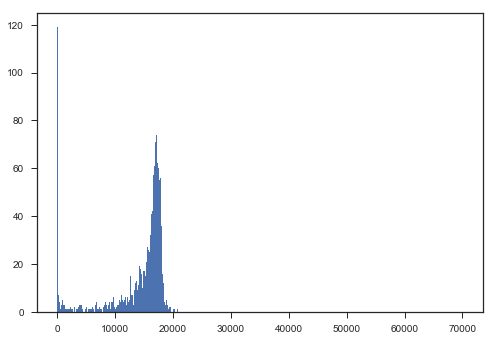

In [403]:
import numpy as np
bin_size = Mb1
plt.close()
len(bin_size)
bins = np.linspace(-0, max(bin_size), 1000)
plt.hist(bin_size, bins)
plt.show()
plt.close()

## Measures of Dispersion

|      | variance  | IQR  | variance no outlier | IQR no outlier |      | 
|------|------|------|------|------|------|
|1MB   |------|------|------|------|------|
|500KB | table|------|------|------|------|
|250KB |------|------|------|------|------|
|100KB |------|------|------|------|------|
|50KB  |------|------|------|------|------|
|10KB  |------|------|------|------|------|
|5KB   |------|------|------|------|------|

WHY JUST ONE POINT AS OUTLIER ?